In [1]:
import numpy as np
import jplus
import get_3dhst as hst
from astropy.io import fits
import elgtools as elg
import MockJPLUS as mtools
import matplotlib.pyplot as plt
import Read_Mocks as read


plotsdir = 'plots/'

# Loading J-PLUS data
print 'Loading J-PLUS'
mag_type = 'gpsfMags'
gal_jplus = jplus.datasets.fetch_jplus_objects(mag_type=mag_type, overwrite=False, 
                                                 object_name="jplus_pz", nchunks=20, mag_limit=[16,24.],
                                                extra_where_conds='',db='dr1', allphotoz=True, upperlimparams=True)


#print 'Computing 3FM'
#dm_min = 0.0 # rough number, to be computed as a function using the actual trumpet plots for individual tiles.

#gal_jplus['dm'] = mtools.gen_3fm(gal_jplus['J0660'][:,0],  gal_jplus['rJAVA'][:,0], gal_jplus['gJAVA'][:,0], 
#                         Broad_NoLineName='gSDSS')

#gal_jplus['err_dm'] = mtools.gen_3fm_err(gal_jplus['J0660'][:,0], gal_jplus['J0660'][:,1], 
#                                         gal_jplus['rJAVA'][:,0], gal_jplus['rJAVA'][:,1], 
#                          gal_jplus['gJAVA'][:,0], gal_jplus['gJAVA'][:,1],Broad_NoLineName='gSDSS')

print 'setting redshift ranges of ELGs'
f_j0660 = jplus.datasets.fetch_jplus_filter('J0660') # Filter transmission curve

w_oii = 3727.0 # OII rest-frame
z_oii = elg.zline(w_oii, f_j0660.wave, f_j0660.throughput)

w_ha = 6563.0
z_ha = elg.zline(w_ha, f_j0660.wave, f_j0660.throughput)

w_hb = 4861.0
z_hb = elg.zline(w_hb, f_j0660.wave, f_j0660.throughput)
        
w_oiii = 5007.0
z_oiii = elg.zline(w_oiii, f_j0660.wave, f_j0660.throughput)

print z_oii, z_ha, z_hb, z_oiii


j-plus [INFO]: Fetching J-PLUS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/jplus_jplus_pz_gpsfMags_dr1_dual_magmax24.0.h5


Loading J-PLUS
setting redshift ranges of ELGs


j-plus [INFO]: Fetching  J-PLUS filters


[0.7482142815072982, 0.7964311035074512] [-0.007223125525262806, 0.020158269506669296] [0.3403815320258589, 0.3773500766863342] [0.30129710948226485, 0.3371876817999342]


In [2]:
# Cross Match with SDSS Phot and add SDSS magnitudes to master, gal_jplus catalogue

AddSDSSPhot = True # This adds SDSS magnitudes to xmatches with gal_jplus, but then removes the original gal_jplus and replaces it with the xmatches
LoadSDSSxJPLUS = True # if False it will perform the cross match. Otherwise it reads a file

xmfile = 'jplus_sdssphot.data'
import pickle
if AddSDSSPhot:

    if LoadSDSSxJPLUS:
        print 'loading x-match'
        gal_jplus = pickle.load(open(xmfile))
        numf = len(gal_jplus['tile_id'])
        print 'Number of objects:%ld'%numf
    else:
        import deepdish as dp
        sdssfile = '/home/CEFCA/aaorsi/work/sdss/sdss_phot.h5'
        # Due to memory restrictions, the file is loaded by chunks

        print 'Loading SDSSPhot coordinates'
        sdss_coords = dp.io.load(sdssfile,'/coords')

        ngal0 = len(gal_jplus['tile_id'])

        print 'Cross-match of SDSSPhot with J-PLUS ...'
        d,ind = jplus.tools.crossmatch_angular(gal_jplus['coords'],sdss_coords,max_distance=1e-3)
        m = ((d != np.inf))
        gal_jplus = jplus.tools.select_object(gal_jplus, m)    
        numf = len(gal_jplus['tile_id'])
        print 'xmatch catalogue contains %ld galaxies, %.2f of the input J-PLUS catalogue' % (numf, float(numf)/ngal0)

        print 'Adding SDSS filters...'

        sdssmags = ['u','g','r','i','z']

        del sdss_coords
        for mag in sdssmags:
            magname = '%sSDSS'%mag
            print magname
            datamag = dp.io.load(sdssfile,'/'+magname)
            gal_jplus[magname] = datamag[ind[m]]
            del datamag

        with open(xmfile,'wb') as outfile:
            pickle.dump(gal_jplus,outfile,protocol=pickle.HIGHEST_PROTOCOL)   
    
        

loading x-match
Number of objects:2397580


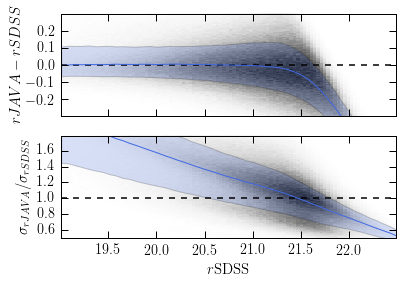

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

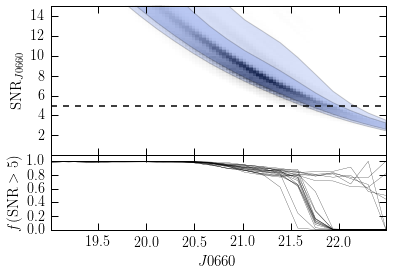

In [3]:
# This takes long.

%matplotlib inline
suff = 'SDSS'
gal = gal_jplus
import matplotlib.gridspec as gsc


if suff == 'SDSS': # check cross-match by comparing rJAVA to rSDSS
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    plt.rc('font', family='STIXGeneral')

    gs = gsc.GridSpec(2,1)
    gs.update(hspace=0.2)
    
    xr = [19.01,22.49]
    yr = [-0.3,0.3]
    ax = plt.subplot(gs[0])
    nm = 50
    marr   = np.linspace(xr[0],xr[1],nm)
    mb     = marr[1] - marr[0]
    ddm    = np.zeros([nm,3])
    dem    = np.zeros([nm,3])
    deltam = gal['rJAVA'][:,0] - gal['rSDSS'][:,0]
    ratio  = gal['rJAVA'][:,1]/gal['rSDSS'][:,1]
    mg     = gal['rSDSS'][:,0]
    counts, ybins, xbins, image = ax.hist2d(mg,deltam,
                                    bins=100, cmap=plt.cm.Greys, normed=LogNorm(), cmin=0.01, label='SDSS contaminants', 
                                    alpha=0.9,range=(xr,yr))
    
    for i in range(nm):
        sel = (mg > marr[i]-mb/2.) & (mg <= marr[i]+mb/2.)
        dd_i  = deltam[sel]
        err_i = ratio[sel]
        
        if len(dd_i) > 0:
            ddm[i,0] = np.percentile(dd_i,50)
            ddm[i,1] = np.percentile(dd_i,20)
            ddm[i,2] = np.percentile(dd_i,80)
        if len(err_i) > 0:
            dem[i,0] = np.percentile(err_i,50)
            dem[i,1] = np.percentile(err_i,20)
            dem[i,2] = np.percentile(err_i,80)
        
        
    ax.plot(xr,[0,0],'--k,')
    
    ax.fill_between(marr, ddm[:,1],ddm[:,2],facecolor='RoyalBlue',alpha=0.2)
    ax.plot(marr,ddm[:,0],'-',color='RoyalBlue',linewidth=1)
    ax.set_ylim(yr)
    ax.set_xlim(xr)
    
    ax.set_ylabel(r'$rJAVA - rSDSS$',fontsize=15)
    ax.set_xticklabels([])

    ax = plt.subplot(gs[1])
    
    yl = [.5,1.79]
    
    counts, ybins, xbins, image = ax.hist2d(mg,ratio,
                                    bins=100, cmap=plt.cm.Greys, normed=LogNorm(), cmin=0.01, label='SDSS contaminants', 
                                    alpha=0.9,range=(xr,yl))

    ax.plot(xr,[1,1],'--k,')
    ax.set_ylim(yl)
    ax.set_xlim(xr)
    ax.fill_between(marr, dem[:,1],dem[:,2],facecolor='RoyalBlue',alpha=0.2)
    ax.plot(marr,dem[:,0],'-',color='RoyalBlue',linewidth=1)

    ax.set_ylabel(r'$\sigma_{rJAVA}/\sigma_{rSDSS}$',fontsize=15)
    ax.set_xlabel(r'$r{\rm SDSS}$',fontsize=15)
    
    plt.show()

    
    mg     = gal['J0660'][:,0]
    nm     = 20
    marr   = np.linspace(xr[0],xr[1],nm)
    mb     = marr[1] - marr[0]

    alltiles = np.unique(gal['tile_id'])
    ntiles = len(alltiles)
    
    plt.figure('ph_errors')#,figsize=(7,7))
    gs = gsc.GridSpec(3,1)
    gs.update(hspace=0.0)
    ax = plt.subplot(gs[0:2])
    yyr = [0.01,15]
    
    snr = 1./gal['J0660'][:,1]
    snr_rj = 1./gal['rJAVA'][:,1]
    snr_rs = 1./gal['rSDSS'][:,1]
    snr_gs = 1./gal['gSDSS'][:,1]
    
    counts, ybins, xbins, image = ax.hist2d(mg,snr,
                                    bins=100, cmap=plt.cm.Greys, normed=LogNorm(), cmin=0.01, label='SDSS contaminants', 
                                    alpha=1.0,range=(xr,yyr))
       
    
    dsnr    = np.zeros([nm,5])
    frac_sn = np.zeros([nm,ntiles])
    sn_limit = 5.0
    for i in range(nm):
        sel = (mg > marr[i]-mb/2.) & (mg <= marr[i]+mb/2.)
        dd_i  = snr[sel]
        
        if len(dd_i) > 0:
            dsnr[i,0] = np.percentile(dd_i,50)
            dsnr[i,1] = np.percentile(dd_i,10)
            dsnr[i,2] = np.percentile(dd_i,20)
            dsnr[i,3] = np.percentile(dd_i,80)
            dsnr[i,4] = np.percentile(dd_i,90)
        
               
    ax.plot(xr,[sn_limit,sn_limit],'--k')
  #  ax.set_xlabel(r'$r{\rm SDSS}$',fontsize=15)
    ax.set_ylabel(r'${\rm SNR}_{J0660}$',fontsize=15)
    ax.set_xlim(xr)
    ax.set_xticklabels([])
    
    ax.fill_between(marr, dsnr[:,1],dsnr[:,4],facecolor='RoyalBlue',alpha=0.2)
    ax.fill_between(marr, dsnr[:,2],dsnr[:,3],facecolor='RoyalBlue',alpha=0.2)
    
    ax = plt.subplot(gs[2])
    
    for it in range(ntiles):
        tt = alltiles[it] 
        print it,
        for i in range(nm):
            sel = (mg > marr[i]-mb/2.) & (mg <= marr[i]+mb/2.)
            selmg = sel & (np.asarray(gal['tile_id']) == tt)
            
            sel2 = (selmg & (snr > sn_limit) & (snr_rj > sn_limit) & 
                   (snr_rs > sn_limit) & (snr_gs > sn_limit))
        
            if len(mg[selmg]) >0:    
                frac_sn[i,it] = (len(snr[sel2]) + 0.0)/(len(mg[selmg]))
        
 #       if it < 10:
 #           print frac_sn[:,it]

    
    
    for i in range(nm):
        ax.plot(marr,frac_sn[:,i],'-k',linewidth=.25)
        
    ax.set_ylim([0,1.09])
    ax.set_xlabel(r'$J0660$',fontsize=15)
    ax.set_ylabel(r'$f({\rm SNR}> 5)$',fontsize=15)
    ax.set_xlim(xr)

        

    
    
    

In [4]:
snrfile = 'snr.data'
snrdata = {'marr': marr, 'frac_sn':frac_sn,'alltiles':alltiles}
with open(snrfile,'wb') as outfile:
        pickle.dump(snrdata,outfile,protocol=pickle.HIGHEST_PROTOCOL)  



In [5]:
# Compute sigma curves for each tile
%matplotlib inline
ComputeSigmas = False
import matplotlib

suff ='SDSS'

import pickle
import matplotlib.gridspec as gsc
if ComputeSigmas:
    
    reload(elg)
    alltiles = np.random.permutation(np.unique(gal_jplus['tile_id']))
    ntiles = len(alltiles)
    print 'Number of tiles:%d'%ntiles
    sigma_tiles = []

    npanels = 5

    gs = gsc.GridSpec(npanels,1)
    gs.update(wspace=0.0, hspace=0.0, top=2)
    gal_jplus['ids'] = np.arange(0,len(gal_jplus['tile_id']))
    gal_jplus['elgcand'] = np.zeros(len(gal_jplus['tile_id']))
    gal_jplus['dm_j0660'] = np.zeros(len(gal_jplus['tile_id']))
    gal_jplus['dm_j0660_err'] = np.zeros(len(gal_jplus['tile_id']))
    nc = 0
    for i in range(ntiles):
    
    #for i in range(20):
        if i < npanels:
            ax = plt.subplot(gs[i])
        
        idcand,dm, dm_err, sfunc = elg.continuum_curve(gal_jplus, alltiles[i], BroadLineName = 'r'+suff,
                 BroadNoLineName='g'+suff, Plot=ax if i < npanels else False,
                 sigma_threshold = 2.0)
        sigma_tiles.append(sfunc)
        
        gal_jplus['elgcand'][idcand] = 1
        gal_jplus['dm_j0660'][idcand] = dm
        gal_jplus['dm_j0660_err'][idcand] = dm_err
        if i == npanels:
            ax.set_xlabel(r'$r%s$'%suff, fontsize=25)
        if i == 2:
            ax.set_ylabel(r'$C^{r,g}-J0660$', fontsize=25)
        #plt.title('TileID: %d'%alltiles[i],fontsize=15)
        nc += len(idcand)
        

        #Save file with sigma curves

        sigma_dict = {'sfunc': sigma_tiles, 'tiles':alltiles}
        sigmafile = 'sigma_curves.data'

        with open(sigmafile,'wb') as outfile:
            pickle.dump(sigma_dict,outfile,protocol=pickle.HIGHEST_PROTOCOL)  



    elg_cand = jplus.tools.select_object(gal_jplus,gal_jplus['elgcand'] == 1)
    print 'saving candidate list...'
    
    with open('elg_cand.data', 'wb') as outfile:
        pickle.dump(elg_cand, outfile, protocol=pickle.HIGHEST_PROTOCOL)
else:
    elg_cand = pickle.load(open('elg_cand.data'))

print 'Number of ELG candidates: %d'%len(elg_cand['tile_id'])



Number of ELG candidates: 233508


NameError: name 'sigma_tiles' is not defined

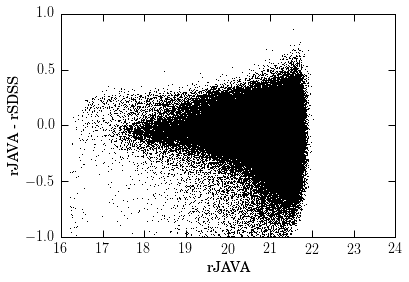

['mask_flags_iJAVA', 'dm_j0660', 'J0861', 'flags_aper3_worstpsf_J0378', 'fwhm', 'cstar', 'flags_aper3_worstpsf_J0515', 'mag_auto_r', 'mask_flags_J0515', 'single_detect_J0395', 'uJAVA', 'dm', 'single_detect_zJAVA', 'flags_aper3_gauss_J0515', 'gJAVA', 'norm_wmap_val_J0378', 'J0378', 'norm_wmap_val_rJAVA', 'single_detect_J0515', 'flags_aper3_gauss_iJAVA', 'flags_aper3_worstpsf_J0660', 'flag_J0430', 'rJAVA', 'flag_uJAVA', 'flags_aper3_worstpsf_J0861', 'elgcand', 'mask_flags_J0660', 'J0515', 'flags_aper3_worstpsf_J0410', 'mask_flags_gJAVA', 'mask_flags_J0861', 'filename', 'single_detect_gJAVA', 'norm_wmap_val_iJAVA', 'flags_aper3_gauss_J0660', 'single_detect_uJAVA', 'err_dm', 'mask_flags_uJAVA', 'norm_wmap_val_J0515', 'flags_aper3_gauss_J0861', 'zSDSS', 'kron_rad', 'XY_IMAGE', 'mask_flags_J0378', 'flag_J0410', 'ids', 'dm_j0660_err', 'single_detect_J0430', 'flags_aper3_worstpsf_J0395', 'flags_aper3_gauss_zJAVA', 'flag_J0395', 'flags_aper3_gauss_uJAVA', 'single_detect_iJAVA', 'mask_flags_J039

In [7]:
%matplotlib inline

if suff == 'SDSS': # check cross-match by comparing rJAVA to rSDSS
    import matplotlib.pyplot as plt

    plt.plot(elg_cand['rJAVA'][:,0],elg_cand['rJAVA'][:,0] - elg_cand['rSDSS'][:,0],'k,')
    plt.ylim([-1,1])
    plt.xlim([16,24])
    plt.xlabel('rJAVA')
    plt.ylabel('rJAVA - rSDSS')

    plt.show()

    print elg_cand.keys()


In [8]:

# Choose which base catalogue to use when constructing the dataset
dc = elg_cand
suff = 'SDSS'

dm, fline, fcont = mtools.gen_3fm(dc['J0660'][:,0],  
                    dc['r'+suff][:,0], dc['g'+suff][:,0], 
                    Broad_NoLineName='g'+suff)

mask = ((dc['dm_j0660'] > 0.4) & # a minimum EW limit -- not sure what this corresponds to
        (dc['r'+suff][:,0] > 20) &  # remove most of H-alpha contaminants
        (dc['mask_flags_J0660'] == 0) & # no artifacts is J0660 photometry
        (dc['mask_flags_rJAVA'] == 0) &
        (dc['single_detect_J0660'] != 0) & # Objects are detected in both rJAVA and J0660
        (1./dc['J0660'][:,1] > 5) &    # SNR of J0660 is above 5
         (1./dc['r'+suff][:,1] > 5) &  # SNR of SDSS r-band is above 5
        (1./dc['rJAVA'][:,1] > 5)     # also SNR of rJAVA is above 5
         )

dcat = jplus.tools.select_object(dc, mask)
dcat['F_j0660'] = fline[mask]
dcat['F_cont_j0660'] = fcont[mask]
print 'Total number of J-PLUS objects for cross-matches: %d'%len(dcat['tile_id'])


Total number of J-PLUS objects for cross-matches: 84442


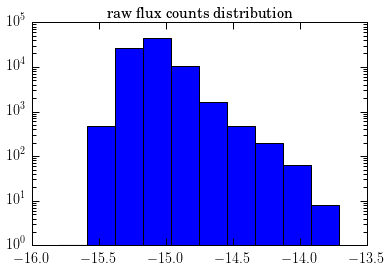

In [9]:
plt.hist(np.log10(np.asarray(dcat['F_j0660'])))
plt.yscale('log', nonposy='clip')
plt.title('raw flux counts distribution')



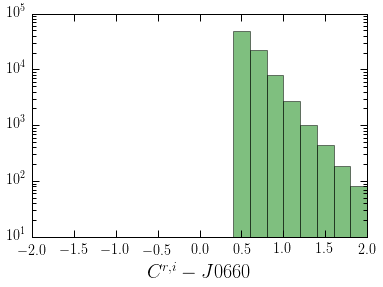

In [10]:
plt.hist(dcat['dm_j0660'], bins=20, color='green', alpha=0.5,range=[-2,2])


plt.xlabel(r'$C^{r,i} - J0660$',fontsize=20)
plt.xlim([-2,2])
plt.legend()
plt.yscale('log', nonposy='clip')



In [11]:
print 'Loading 3D-HST and DEEP2'
# Loading 3D-HST and DEEP2 DR4 data

hstdata = hst.select_3DHST_z(0,5)#,LineName='Ha_flux',LineMin=0.001)
nhst = len(hstdata['ra'])
hst_coords = np.zeros([nhst,2])

for i in range(nhst):
    hst_coords[i,:] = [hstdata['ra'][i],hstdata['dec'][i]]
hstdata['coords'] = hst_coords

deep2_data = '/home/CEFCA/aaorsi/work/elg_jplus/spec/deep2/dr4/zcat.deep2.dr4.fits'
deep2 = fits.open(deep2_data)[1].data


# XMatch with 3DHST
print 'xmatch with 3DHST'
d,ind = jplus.tools.crossmatch_angular(dcat['coords'],hstdata['coords'],max_distance=3e-3)
m = ((d != np.inf))

jhst0 = jplus.tools.select_object(dcat, m)
jhst0['z_spec'] = hstdata['z'][ind[m]]

elg_hst =  (
            (((jhst0['z_spec'] > z_ha[0])   & (jhst0['z_spec'] < z_ha[1]))   |
           ((jhst0['z_spec'] > z_hb[0])   & (jhst0['z_spec'] < z_hb[1]))   |
           ((jhst0['z_spec'] > z_oiii[0]) & (jhst0['z_spec'] < z_oiii[1])) |
           ((jhst0['z_spec'] > z_oii[0])  & (jhst0['z_spec'] < z_oii[1]))))

jhst = jplus.tools.select_object(jhst0, elg_hst)
nhst = len(jhst['z_spec'])
jhst['idd'] = np.arange(nhst)


# xmatch with DEEP2
print 'xmatch with DEEP2'
d2mask = ((deep2['ZQUALITY'] > 2) &  # Select only Deep2 objects with good quality Redshifts
        (deep2['Z'] <= z_ha[1]) |
           ((deep2['Z'] >= z_hb[0])   &   (deep2['Z'] <= z_hb[1]))   |
           ((deep2['Z'] >= z_oiii[0]) &   (deep2['Z'] <= z_oiii[1])) |
           ((deep2['Z'] >= z_oii[0])  &   (deep2['Z'] <= z_oii[1])))
          
          
ndeep2 = len(deep2['RA'][d2mask])
dcoords = np.asarray([[deep2['RA'][d2mask][i], deep2['DEC'][d2mask][i]] for i in range(ndeep2)])
d,ind = jplus.tools.crossmatch_angular(dcat['coords'],dcoords,max_distance=3e-3)
m = ((d != np.inf))

jdeep2 = jplus.tools.select_object(dcat, m )
jdeep2['z_spec'] = deep2['Z'][d2mask][ind[m]]
ndeep2 = len(jdeep2['z_spec'])  
#jdeep2['idd'] = np.arange(ndeep2)
print jdeep2['z_spec']
print jhst['z_spec']
print 'Done loading data!'

Loading 3D-HST and DEEP2
xmatch with 3DHST
xmatch with DEEP2
[0.3687895  0.34784138 0.36932802 0.78144133 0.36167777 0.7519522 ]
[]
Done loading data!


Reading and performing cross-match with ALHAMBRA objects
['F830W', 'F814W', 'F799W', 'F644W', 'F892W', 'F954W', 'F582W', 'zphoto', 'F427W', 'F675W', 'F551W', 'F768W', 'F365W', 'F706W', 'F458W', 'cstar', 'F489W', 'F861W', 'F923W', 'coords', 'F613W', 'F396W', 'F737W', 'F520W']
Cross match between Alhambra and J-PLUS results in 108 objects
14


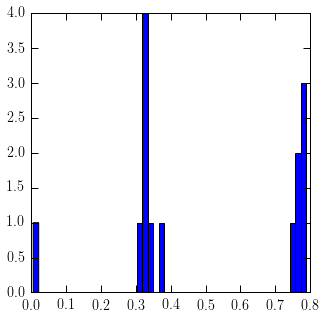

In [12]:
print 'Reading and performing cross-match with ALHAMBRA objects'
import deepdish as dd
AlhambraFile = '/home/CEFCA/aaorsi/work/alhambra/Alhambra.hdf5'

alh = dd.io.load(AlhambraFile)
print alh.keys()


alh_d,alh_ind = jplus.tools.crossmatch_angular(dcat['coords'],alh['coords'],max_distance=3e-4)
alh_m = ((alh_d != np.inf))

j_alh = jplus.tools.select_object(dcat, alh_m)
print 'Cross match between Alhambra and J-PLUS results in %ld objects' % len(j_alh['tile_id'])
j_alh['z_spec'] = alh['zphoto'][alh_ind[alh_m]]

plt.rcParams['figure.figsize'] = 5, 5

mask_elgs =  (
            (((j_alh['z_spec'] > z_ha[0])   & (j_alh['z_spec'] < z_ha[1]))   |
           ((j_alh['z_spec'] > z_hb[0])   & (j_alh['z_spec'] < z_hb[1]))   |
           ((j_alh['z_spec'] > z_oiii[0]) & (j_alh['z_spec'] < z_oiii[1])) |
           ((j_alh['z_spec'] > z_oii[0])  & (j_alh['z_spec'] < z_oii[1]))))


plt.hist(j_alh['z_spec'][mask_elgs], bins=50)
nalh = len(j_alh['z_spec'][mask_elgs])

j_alhambra = jplus.tools.select_object(j_alh, mask_elgs)

print nalh


j-plus [INFO]: Fetching SDSS objects
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/sdss_galaxies_aperMags_magmax21.0.h5


Cross-match of SDSS phot with J-PLUS ...
xmatch catalogue contains 2893 galaxies
70 SDSS ELGs, 2823 interlopers


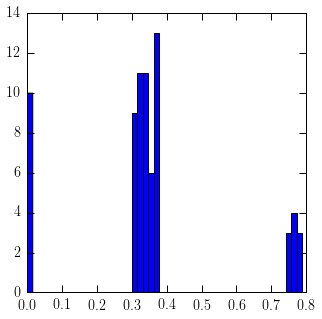

In [13]:
# Loading SDSS data

gal_sdss_spec = jplus.datasets.fetch_sdss_objects(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 5, spectroscopic=True, 
                                                    casjobs=True, object_name="galaxies")

print 'Cross-match of SDSS phot with J-PLUS ...'
d,ind = jplus.tools.crossmatch_angular(dcat['coords'],gal_sdss_spec['coords'],max_distance=3e-4)
m = ((d != np.inf))

j_spec = jplus.tools.select_object(dcat, m)

        
print 'xmatch catalogue contains %ld galaxies' % len(j_spec['tile_id'])
        #jplus['in_sdss'] = m
        # Adding SDSS magnitudes
j_spec['rSDSS'] = gal_sdss_spec['rSDSS'][ind[m]]
j_spec['iSDSS'] = gal_sdss_spec['iSDSS'][ind[m]]
j_spec['uSDSS'] = gal_sdss_spec['uSDSS'][ind[m]]
j_spec['gSDSS'] = gal_sdss_spec['gSDSS'][ind[m]]
j_spec['zSDSS'] = gal_sdss_spec['zSDSS'][ind[m]]
j_spec['z_spec'] = gal_sdss_spec['zspec'][ind[m]]

plt.rcParams['figure.figsize'] = 5, 5

mask_elgs =  (
            (((j_spec['z_spec'] > z_ha[0])   & (j_spec['z_spec'] < z_ha[1]))   |
           ((j_spec['z_spec'] > z_hb[0])   & (j_spec['z_spec'] < z_hb[1]))   |
           ((j_spec['z_spec'] > z_oiii[0]) & (j_spec['z_spec'] < z_oiii[1])) |
           ((j_spec['z_spec'] > z_oii[0])  & (j_spec['z_spec'] < z_oii[1]))))


plt.hist(j_spec['z_spec'][mask_elgs], bins=50)
nsdss = len(j_spec['z_spec'][mask_elgs])

j_sdss = jplus.tools.select_object(j_spec, mask_elgs)

j_sdss_interlopers = jplus.tools.select_object(j_spec, ~mask_elgs) #interlopers, i.e. outside ELG redshifts

nsdss_inter = len(j_sdss_interlopers['z_spec'])


print '%d SDSS ELGs, %d interlopers' % (nsdss, nsdss_inter)


In [14]:
# Interlopers, stars and QSOs:

stars_sdss_spec = jplus.datasets.fetch_sdss_objects(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 5, spectroscopic=True, 
                                                    casjobs=True, object_name="stars")

qso_sdss_spec = jplus.datasets.fetch_sdss_objects(mag_type="aperMags",overwrite=False,mag_limit=[16,21], extinction=False,
                                                          clean = True, nchunks = 5, spectroscopic=True, 
                                                    casjobs=True, object_name="qso")


print 'Cross-match of SDSS QSOs with ELG cands ...'
d,ind = jplus.tools.crossmatch_angular(dcat['coords'],qso_sdss_spec['coords'],max_distance=3e-4)
m = ((d != np.inf))

q_spec = jplus.tools.select_object(dcat, m)

        
print 'xmatch catalogue contains %ld galaxies' % len(j_spec['tile_id'])
        #jplus['in_sdss'] = m
        # Adding SDSS magnitudes
q_spec['rSDSS'] = qso_sdss_spec['rSDSS'][ind[m]]
q_spec['iSDSS'] = qso_sdss_spec['iSDSS'][ind[m]]
q_spec['uSDSS'] = qso_sdss_spec['uSDSS'][ind[m]]
q_spec['gSDSS'] = qso_sdss_spec['gSDSS'][ind[m]]
q_spec['zSDSS'] = qso_sdss_spec['zSDSS'][ind[m]]
q_spec['z_spec'] = qso_sdss_spec['zspec'][ind[m]]

nqso = len(q_spec['z_spec'])


print 'Cross-match of SDSS stars with ELG cands ...'
d,ind = jplus.tools.crossmatch_angular(dcat['coords'],stars_sdss_spec['coords'],max_distance=3e-4)
m = ((d != np.inf))

s_spec = jplus.tools.select_object(dcat, m)

        
print 'xmatch catalogue contains %ld galaxies' % len(j_spec['tile_id'])
        #jplus['in_sdss'] = m
        # Adding SDSS magnitudes
s_spec['rSDSS'] = stars_sdss_spec['rSDSS'][ind[m]]
s_spec['iSDSS'] = stars_sdss_spec['iSDSS'][ind[m]]
s_spec['uSDSS'] = stars_sdss_spec['uSDSS'][ind[m]]
s_spec['gSDSS'] = stars_sdss_spec['gSDSS'][ind[m]]
s_spec['zSDSS'] = stars_sdss_spec['zSDSS'][ind[m]]
s_spec['z_spec'] = np.zeros(len(ind[m])) #stars

nstars = len(s_spec['z_spec'])

print 'ELG cands include %d stars and %d known QSOs' % (nstars, nqso)


ncontaminants = nstars + nqso + nsdss_inter




j-plus [INFO]: Fetching SDSS objects
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/sdss_stars_aperMags_magmax21.0.h5
j-plus [INFO]: Fetching SDSS objects
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/sdss_qso_aperMags_magmax21.0.h5


Cross-match of SDSS QSOs with ELG cands ...
xmatch catalogue contains 2893 galaxies
Cross-match of SDSS stars with ELG cands ...
xmatch catalogue contains 2893 galaxies
ELG cands include 199 stars and 760 known QSOs


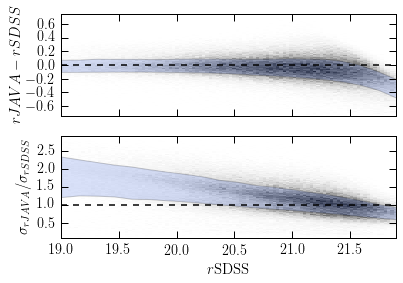

['mask_flags_iJAVA', 'dm_j0660', 'J0861', 'flags_aper3_worstpsf_J0378', 'fwhm', 'cstar', 'flags_aper3_worstpsf_J0515', 'mag_auto_r', 'mask_flags_J0515', 'single_detect_J0395', 'uJAVA', 'dm', 'single_detect_zJAVA', 'flags_aper3_gauss_J0515', 'gJAVA', 'norm_wmap_val_J0378', 'J0378', 'norm_wmap_val_rJAVA', 'single_detect_J0515', 'flags_aper3_gauss_iJAVA', 'flags_aper3_worstpsf_J0660', 'flag_J0430', 'rJAVA', 'flag_uJAVA', 'flags_aper3_worstpsf_J0861', 'elgcand', 'mask_flags_J0660', 'J0515', 'flags_aper3_worstpsf_J0410', 'mask_flags_gJAVA', 'mask_flags_J0861', 'filename', 'single_detect_gJAVA', 'norm_wmap_val_iJAVA', 'flags_aper3_gauss_J0660', 'single_detect_uJAVA', 'err_dm', 'mask_flags_uJAVA', 'norm_wmap_val_J0515', 'flags_aper3_gauss_J0861', 'zSDSS', 'kron_rad', 'XY_IMAGE', 'mask_flags_J0378', 'flag_J0410', 'ids', 'dm_j0660_err', 'single_detect_J0430', 'flags_aper3_worstpsf_J0395', 'flags_aper3_gauss_zJAVA', 'flag_J0395', 'flags_aper3_gauss_uJAVA', 'single_detect_iJAVA', 'mask_flags_J039

In [15]:
%matplotlib inline

if suff == 'SDSS': # check cross-match by comparing rJAVA to rSDSS
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    plt.rc('font', family='STIXGeneral')

    gs = gsc.GridSpec(2,1)
    gs.update(hspace=0.2)
    
    xr = [19,21.9]
    
    ax = plt.subplot(gs[0])
    nm = 20
    marr   = np.linspace(xr[0],xr[1],nm)
    mb = marr[1] - marr[0]
    ddm    = np.zeros([nm,3])
    dem    = np.zeros([nm,3])
    deltam = elg_cand['rJAVA'][:,0] - elg_cand['rSDSS'][:,0]
    ratio  = elg_cand['rJAVA'][:,1]/elg_cand['rSDSS'][:,1]
    mg = elg_cand['rSDSS'][:,0]
    counts, ybins, xbins, image = ax.hist2d(mg,deltam,
                                    bins=100, cmap=plt.cm.Greys, normed=LogNorm(), cmin=0.01, label='SDSS contaminants', 
                                    alpha=0.9,range=(xr,[-.75,.749]))
    
    for i in range(nm):
        sel = (mg > marr[i]-mb/2.) & (mg <= marr[i]+mb/2.)
        dd_i  = deltam[sel]
        err_i = ratio[sel]
        
        if len(dd_i) > 0:
            ddm[i,0] = np.percentile(dd_i,50)
            ddm[i,1] = np.percentile(dd_i,20)
            ddm[i,2] = np.percentile(dd_i,80)
        if len(err_i) > 0:
            dem[i,0] = np.percentile(err_i,50)
            dem[i,1] = np.percentile(err_i,20)
            dem[i,2] = np.percentile(err_i,80)
        
        
        
    
    
    ax.plot(xr,[0,0],'--k,')
    
    ax.fill_between(marr, ddm[:,1],ddm[:,2],facecolor='RoyalBlue',alpha=0.2)
    #ax.plot(marr,ddm[:,0],'.-',color='RoyalBlue',linewidth=3)
    ax.set_ylim([-.75,.749])
    ax.set_xlim(xr)
    
    ax.set_ylabel(r'$rJAVA - rSDSS$',fontsize=15)
    ax.set_xticklabels([])

    ax = plt.subplot(gs[1])
    
    yl = [.1,2.9]
    
    counts, ybins, xbins, image = ax.hist2d(mg,ratio,
                                    bins=100, cmap=plt.cm.Greys, normed=LogNorm(), cmin=0.01, label='SDSS contaminants', 
                                    alpha=0.9,range=(xr,yl))

    ax.plot(xr,[1,1],'--k,')
    ax.set_ylim(yl)
    ax.set_xlim(xr)
    ax.fill_between(marr, dem[:,1],dem[:,2],facecolor='RoyalBlue',alpha=0.2)
   # ax.plot(marr,dem[:,0],'.-',color='RoyalBlue',linewidth=3)

    ax.set_ylabel(r'$\sigma_{rJAVA}/\sigma_{rSDSS}$',fontsize=15)
    ax.set_xlabel(r'$r{\rm SDSS}$',fontsize=15)
    
    plt.show()

    print elg_cand.keys()


In [16]:
# Loading Lightcone galaxies
nCone = 512
lcone = []
reload(read)
#Mockpath = '/home/CEFCA/aaorsi/work/JPLUS_Mock/new/Lines/'
Mockpath = '/home/CEFCA/aaorsi/work/JPLUS_Mock/new_0918/'
namelc   = 'LightCone_SA_0_'

print 'reading Lightcone...'
for i in range(nCone): #nCone):
    nameIn = '%s%s%d' % (Mockpath, namelc, i)
    ilc = read.readmock_chunk_PythonCut(nameIn, zspace = True)
    lcone.append(ilc[0])
    
dcone = np.concatenate(lcone)

reading Lightcone...


In [17]:
dcone[0]['ObsMagDust']
print dcone.dtype
names_filters = ['uJAVA' , 'J0378', 'J0395', 'J0410', 'J0430', 'gSDSS',
                         'J0515', 'rSDSS', 'J0660', 'iSDSS', 'J0861', 'zSDSS']

nf = len(names_filters)
mockgals = {}

for _i in range(nf):
    fname = names_filters[_i]
    mockgals[fname] = dcone['ObsMagDust'][_i,:]

mockgals['redshift'] = dcone['redshift']

print mockgals.keys()





[('Type', '<i4'), ('FOFMvir', '<f4'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('sfr', '<f4'), ('sfr_inst', '<f4'), ('BulgeMass', '<f4'), ('DiskMass', '<f4'), ('Mvir', '<f4'), ('redshift', '<f4'), ('MetalColdGas', '<f4'), ('ColdGas', '<f4'), ('BlackHoleMass', '<f4'), ('ObsMagDust', '<f4', (12,))]
['uJAVA', 'rSDSS', 'iSDSS', 'J0861', 'gSDSS', 'J0395', 'redshift', 'zSDSS', 'J0378', 'J0430', 'J0660', 'J0410', 'J0515']


In [18]:
# Loading synthetic photometry from various surveys
import learn_elgs as learn
reload(learn)
tfout = '/home/CEFCA/aaorsi/work/elg_jplus/trainspec.dat'
vvds = '/home/CEFCA/aaorsi/work/elg_jplus/trainspec_vvds.dat'
alleboss, photo_eboss = learn.Load_Synthetic_Sample(tfout,overwrite=False, survey='eBOSS', get_sdss_filters=True,
                                                  sdssxjplus=False)

allvvds, photo_vvds = learn.Load_Synthetic_Sample(vvds,overwrite=False, survey='VVDS', get_sdss_filters=True,
                                                  sdssxjplus=False,field=['F02_UDEEP','F02_DEEP'])


allspec = alleboss + allvvds

photo_spec = {}
nvvds = len(photo_vvds['uJAVA'])
for key in photo_eboss.keys():
    photo_spec[key] = photo_eboss[key].tolist()
    for j in range(nvvds):
        photo_spec[key].append(photo_vvds[key][j])
    photo_spec[key] = np.asarray(photo_spec[key])



j-plus [INFO]:    Downloading eBOSS ELG composite spectrum from https://data.sdss.org/sas/dr13/eboss/elg/composite/v1_0/eBOSS_ELG_composite.fits


j-plus [INFO]:    Downloading eBOSS ELG composite spectrum from https://data.sdss.org/sas/dr13/eboss/elg/composite/v1_0/eBOSS_ELG_composite.fits


j-plus [INFO]: Fetching  J-PLUS filters
j-plus [INFO]: Fetching  J-PLUS filters



[-0.007223125525262806, 0.020158269506669296]
[0.30129710948226485, 0.3371876817999342]
[0.3403815320258589, 0.3773500766863342]
[0.7482142815072982, 0.7964311035074512]
[-0.007223125525262806, 0.020158269506669296]
[0.30129710948226485, 0.3371876817999342]
[0.3403815320258589, 0.3773500766863342]
[0.7482142815072982, 0.7964311035074512]


In [19]:
photo_vvds.keys()
print len(photo_vvds['zSDSS'])
print type(photo_spec['zSDSS'])
print photo_spec['zSDSS'][0]
print photo_spec['zSDSS'][-1]
print len(photo_spec['zSDSS'])
print allspec[0],allspec[-1]

61
<type 'numpy.ndarray'>
[21.90532866  0.        ]
[24.32974003  0.        ]
648
{'w': array([ 3564.5117,  3565.3318,  3566.1538, ..., 10337.131 , 10339.515 ,
       10341.887 ], dtype=float32), 'flux': array([[1.69137859e-18, 0.00000000e+00],
       [1.71285220e-18, 0.00000000e+00],
       [1.74917101e-18, 0.00000000e+00],
       ...,
       [1.80121618e-18, 0.00000000e+00],
       [1.72088381e-18, 0.00000000e+00],
       [1.61655225e-18, 0.00000000e+00]]), 'survey': 'eBOSS', 'file': '/home/CEFCA/aaorsi/work/elg_jplus/spec/eboss/spec-8123-56931-0012.fits', 'z': 0.307446, 'name': 'OIII'} {'w': array([3510.71 , 3516.065, 3521.42 , ..., 9476.18 , 9481.535, 9486.89 ]), 'flux': array([[7.55692174e-20, 0.00000000e+00],
       [7.55692174e-20, 0.00000000e+00],
       [7.55692174e-20, 0.00000000e+00],
       ...,
       [1.19646493e-19, 0.00000000e+00],
       [1.08290066e-19, 0.00000000e+00],
       [1.10618514e-19, 0.00000000e+00]]), 'survey': 'VVDS-F02_UDEEP', 'file': ['/home/CEFCA/aaorsi

In [20]:
%matplotlib inline
import matplotlib.gridspec as gsc

ngals_tot = ndeep2 + nhst + nsdss + nalh + ncontaminants
print 'Total number of objects in data set: %d'%ngals_tot

dataspec = {}

for key in jdeep2:
    if key == 'date' or key == 'SQL_query' or key == 'filename':
        continue
    counter = 0
    value_hst   = jhst[key]
    value_deep2 = jdeep2[key]
    value_sdss  = j_sdss[key]
    value_alh   = j_alhambra[key]
    value_int   = j_sdss_interlopers[key]
    value_star  = s_spec[key]
    value_qso   = q_spec[key]
    shape = value_deep2.shape
    ndim = value_deep2.ndim
    dataspec[key] = np.zeros(ngals_tot) if ndim == 1 else np.zeros([ngals_tot, shape[1]])
    counter += ndeep2
    dataspec[key][0:counter] = value_deep2
    dataspec[key][counter:counter+nhst] = value_hst   
    counter += nhst
    dataspec[key][counter:counter+nsdss] = value_sdss   
    counter += nsdss
    dataspec[key][counter:counter+nalh] = value_alh   
    counter += nalh
    dataspec[key][counter:counter+nstars] = value_star   
    counter += nstars
    dataspec[key][counter:counter+nqso] = value_qso   
    counter += nqso
    dataspec[key][counter:counter+nsdss_inter] = value_int   
    counter += nsdss_inter
    
    

dataspec['type'] = []
for i in range(ndeep2):
    dataspec['type'].append('DEEP2')
for i in range(nhst):
    dataspec['type'].append('3D-HST')
for i in range(nsdss):
    dataspec['type'].append('SDSS')
for i in range(nalh):
    dataspec['type'].append('Alhambra')
for i in range(ncontaminants):
    dataspec['type'].append('SDSS contaminants')
    
dataspec['index'] = np.arange(counter)    
print counter


Total number of objects in data set: 3872
3872


In [21]:
print 14**2

196


In [22]:
# Plot all dataset # This could be crazy slow an uninformative
Plot_TrainingSet = False
import matplotlib.pyplot as plt

if Plot_TrainingSet:

    filternames = [ 'J0378','J0395', 'J0410','J0430','J0515', 'J0660',
                   'J0861','uJAVA', 'gJAVA', 'rJAVA', 'iJAVA','zJAVA']
                #  'uSDSS', 'gSDSS', 'rSDSS', 'iSDSS', 'zSDSS']

    sdss_fnames = ['uSDSS', 'gSDSS', 'rSDSS', 'iSDSS', 'zSDSS']
    sdss_mw     = [3543, 4770, 6231, 7625, 9134]

  
    grid = [14,14]
    gs = gsc.GridSpec(grid[0],grid[1])
    gs.update(wspace=0.035, hspace=0.035)

    plt.rcParams['figure.figsize'] = 60, 60

    
    nxm = len(dataspec['tile_id'])
    print 'Number of xmatched ELGs: %ld'%nxm
    dataspec['dm'], dfline, dfcont = mtools.gen_3fm(dataspec['J0660'][:,0], dataspec['rJAVA'][:,0], 
                              dataspec['iJAVA'][:,0],Broad_NoLineName='iSDSS')

    ix = 0
    iy = 0
    idg = 0

    sortz = np.argsort(dataspec['z_spec'])

    for i0 in range(nxm):
        i = sortz[i0]
        ax= plt.subplot(gs[ix,iy])
        idg = ix + grid[0]*iy
        for fname in filternames:
            filt = jplus.tools.fetch_jplus_filter(fname, quiet=True)
    #        print np.median(filt.wave)
            ww = [filt.avgwave(), filt.avgwave()]
            ff = [dataspec[fname][i,0], dataspec[fname][i,0]]

            ax.plot(ww,ff,'o', color='blue', markersize=10)
            ax.errorbar(ww,ff,yerr= dataspec[fname][i,1], color='blue')


            if fname == 'J0660':# or fname == 'J0378' or fname == 'J0395' or fname=='J0861':
                fwidth = filt.rectwidth()
                ax.fill_between([ww[0] - fwidth/2.,ww[0] + fwidth/2.,ww[0] + fwidth/2.,ww[0] - fwidth/2.],
                            [17,17, 28, 28],facecolor='Grey',alpha=0.1)
        fw = 0   
        if sdss_fnames[0] in dataspec: # if sdss bands exist
            for fname in sdss_fnames:
                filt = jplus.tools.fetch_sdss_filter(fname, quiet=True)
    #        ww = [filt[0,filt[1,:].argmax()],filt[0,filt[1,:].argmax()]]
                ww = [sdss_mw[fw], sdss_mw[fw]]
                fw += 1
                ff = [dataspec[fname][i,0], dataspec[fname][i,0]]
                ax.plot(ww,ff,'o', color='red', markersize=10)
                ax.errorbar(ww,ff,yerr= dataspec[fname][i,1], color='red')

        ax.text(0.3,0.9,r'$z_{\rm spec}=%.2f$'%dataspec['z_spec'][i], transform= ax.transAxes, fontsize=12)
        ax.text(0.3,0.8,r'$\Delta m=%.2f$'%dataspec['dm_j0660'][i], transform= ax.transAxes, fontsize=12, color='red')
        ax.text(0.3,0.7,dataspec['type'][i], transform= ax.transAxes, fontsize=12, color='black')
        ax.text(0.1,0.9,'(%d)'%idg, transform=ax.transAxes,fontsize=15)
        ax.set_ylim([25, 17.99])
        ax.set_xlim([3000, 8999])
        if ix != grid[0]-1:
            ax.set_xticklabels([])
        if iy >0:
            ax.set_yticklabels([])
        ix +=1
        if ix == grid[0]:
            ix = 0
            iy += 1

    plt.show()        


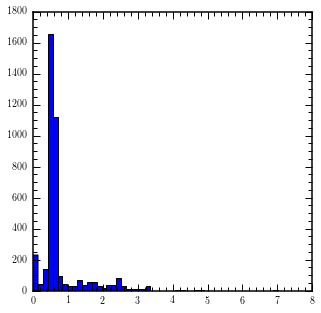

In [23]:
plt.rcParams['figure.figsize'] = 5, 5
plt.hist(dataspec['z_spec'],bins=50)
plt.show()

In [24]:
# Classifying the full set of galaxies
dataspec['class'] = []
for i in range(ngals_tot):
    zp = dataspec['z_spec'][i]
    if dataspec['type'][i] == 'SDSS contaminants':
        dataspec['class'].append('contaminant')
    elif zp < z_ha[1]:
        dataspec['class'].append('Halpha')
#    elif (zp > z_ha[1]) and (zp < z_oiii[1]):
#        dataspec['class'].append('OIII')
#    elif (zp > z_oiii[1]) and (zp < z_hb[1]):
#        dataspec['class'].append('Hbeta')
    elif (zp > z_ha[1]) and (zp < z_hb[1]):
        dataspec['class'].append('OIII+Hbeta')
    elif (zp > 0.5):
        dataspec['class'].append('OII')
    else:
        print 'something is wrong with this redshift: %f'%zp

m_null = np.asarray(dataspec['class']) == 'contaminant'
m_z0  = np.asarray(dataspec['class']) == 'Halpha'
m_zp3 = np.asarray(dataspec['class']) == 'OIII+Hbeta'
#m_zp35 = np.asarray(dataspec['class']) == 'Hbeta'
m_zp7 = np.asarray(dataspec['class']) == 'OII'

n_null = len(dataspec['z_spec'][m_null])
nz0  = len(dataspec['z_spec'][m_z0])
nzp3 = len(dataspec['z_spec'][m_zp3])  
#nzp35 = len(dataspec['z_spec'][m_zp35])  
nzp7 = len(dataspec['z_spec'][m_zp7])
print 'Number of Halpha emitters: %ld' % nz0
print 'Number of OIII+Hbeta emitters: %ld' % nzp3       
#print 'Number of Hbeta emitters: %ld' % nzp35
print 'Number of OII emitters: %ld' % nzp7
print 'Number of contaminants: %ld' % n_null


Number of Halpha emitters: 11
Number of OIII+Hbeta emitters: 61
Number of OII emitters: 18
Number of contaminants: 3782


Number of xmatched ELGs: 16
84
no Halpha in DEEP2
50
57
no Halpha in SDSS contaminants
57
88
5
26
no OII in SDSS contaminants
81
80
0
67
no OIII+Hbeta in SDSS contaminants
19
no contaminant in Alhambra
3570
no contaminant in DEEP2
1170
no contaminant in SDSS
3042
2107


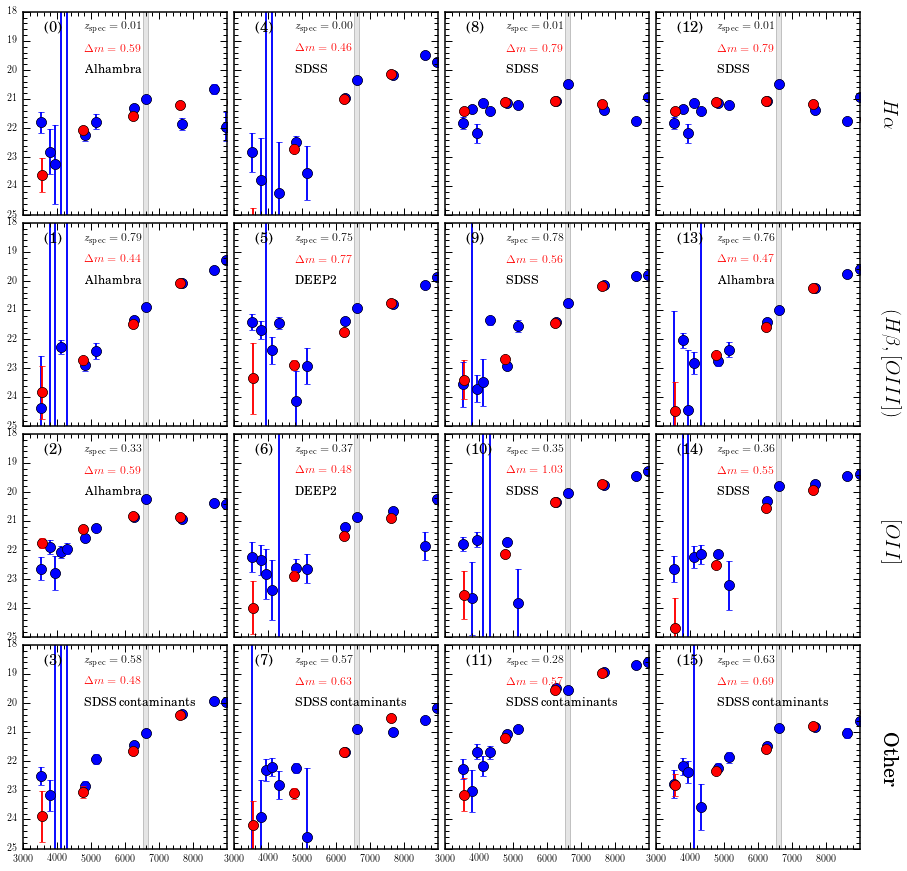

In [25]:
# Plot (some) dataset objects

Plot_TrainingSet = True
import matplotlib.pyplot as plt

if Plot_TrainingSet:

    filternames = [ 'J0378','J0395', 'J0410','J0430','J0515', 'J0660',
                   'J0861','uJAVA', 'gJAVA', 'rJAVA', 'iJAVA','zJAVA']
                #  'uSDSS', 'gSDSS', 'rSDSS', 'iSDSS', 'zSDSS']

    sdss_fnames = ['uSDSS', 'gSDSS', 'rSDSS', 'iSDSS', 'zSDSS']
    sdss_mw     = [3543, 4770, 6231, 7625, 9134]

  
    grid = [4,4]
    gs = gsc.GridSpec(grid[0],grid[1])
    gs.update(wspace=0.035, hspace=0.035)

    plt.rcParams['figure.figsize'] = 15, 15

    
    nxm = grid[0]*grid[1]
    print 'Number of xmatched ELGs: %ld'%nxm
    
    ix = 0
    iy = 0
    idg = 0
    
    types = np.unique(dataspec['class'])
    sarr= np.unique(dataspec['type'])
    
     
    
    ssarr = [r'$H\alpha$',r'$(H\beta, [OIII])$',r'$[OII]$','Other']
    #types[-1] = 'SDSS'
    sortz = []
    ichoice = []
    for ii in types:
        for jj in sarr:
            nn = np.where((np.asarray(dataspec['class']) == ii) & 
                            (np.asarray(dataspec['type']) ==jj ))[0]
            if len(nn) == 0:
                print 'no %s in %s'% (ii, jj)
                nn = np.where(np.asarray(dataspec['class']) == ii
                            )[0]
            
            ichoice= np.random.choice(nn)
            print ichoice
            sortz.append(ichoice)
        
    for i0 in range(nxm):
        i = sortz[i0]
        ax= plt.subplot(gs[ix,iy])
        idg = ix + grid[0]*iy
        for fname in filternames:
            filt = jplus.tools.fetch_jplus_filter(fname, quiet=True)
    #        print np.median(filt.wave)
            ww = [filt.avgwave(), filt.avgwave()]
            ff = [dataspec[fname][i,0], dataspec[fname][i,0]]

            ax.plot(ww,ff,'o', color='blue', markersize=10)
            ax.errorbar(ww,ff,yerr= dataspec[fname][i,1], color='blue')

            if fname == 'J0660':# or fname == 'J0378' or fname == 'J0395' or fname=='J0861':
                fwidth = filt.rectwidth()
                ax.fill_between([ww[0] - fwidth/2.,ww[0] + fwidth/2.,ww[0] + fwidth/2.,ww[0] - fwidth/2.],
                            [17,17, 28, 28],facecolor='Grey',alpha=0.2)
            #    mf = np.max(filt.throughput)
            #    ax.fill_between(filt.wave,-25 + (filt.throughput/mf*21)
            #   ,facecolor='Grey',alpha=0.2)
        fw = 0   
        if sdss_fnames[0] in dataspec: # if sdss bands exist
            for fname in sdss_fnames:
                filt = jplus.tools.fetch_sdss_filter(fname, quiet=True)
    #        ww = [filt[0,filt[1,:].argmax()],filt[0,filt[1,:].argmax()]]
                ww = [sdss_mw[fw], sdss_mw[fw]]
                fw += 1
                ff = [dataspec[fname][i,0], dataspec[fname][i,0]]
                ax.plot(ww,ff,'o', color='red', markersize=10)
                ax.errorbar(ww,ff,yerr= dataspec[fname][i,1], color='red')

        ax.text(0.3,0.9,r'$z_{\rm spec}=%.2f$'%dataspec['z_spec'][i], transform= ax.transAxes, fontsize=12)
        ax.text(0.3,0.8,r'$\Delta m=%.2f$'%dataspec['dm_j0660'][i], transform= ax.transAxes, fontsize=12, color='red')
        ax.text(0.3,0.7,dataspec['type'][i], transform= ax.transAxes, fontsize=12, color='black')
        ax.text(0.1,0.9,'(%d)'%idg, transform=ax.transAxes,fontsize=15)
        ax.set_ylim([25, 17.99])
        ax.set_xlim([3000, 8999])
        if ix != grid[0]-1:
            ax.set_xticklabels([])
        if iy >0:
            ax.set_yticklabels([])
        iy +=1
        if iy == grid[1]:
            ax.text(1.1,0.5,ssarr[ix],transform=ax.transAxes, fontsize=20,rotation=-90)
            iy = 0
            ix += 1
            

    plt.show()        



['flags_aper3_gauss_uJAVA', 'flags_aper3_gauss_J0378', 'dm_j0660', 'J0861', 'flags_aper3_worstpsf_J0378', 'fwhm', 'cstar', 'flags_aper3_worstpsf_J0515', 'mag_auto_r', 'flags_aper3_gauss_iJAVA', 'mask_flags_J0515', 'single_detect_J0395', 'uJAVA', 'dm', 'F_j0660', 'single_detect_zJAVA', 'z_spec', 'flags_aper3_gauss_J0515', 'gJAVA', 'norm_wmap_val_J0378', 'J0378', 'norm_wmap_val_rJAVA', 'single_detect_J0515', 'coords', 'flag_J0430', 'flags_aper3_gauss_zJAVA', 'flag_uJAVA', 'flags_aper3_worstpsf_J0861', 'elgcand', 'mask_flags_J0660', 'J0515', 'flags_aper3_worstpsf_J0410', 'mask_flags_gJAVA', 'index', 'flags_aper3_worstpsf_J0430', 'single_detect_gJAVA', 'norm_wmap_val_iJAVA', 'flags_aper3_gauss_J0660', 'single_detect_uJAVA', 'F_cont_j0660', 'err_dm', 'mask_flags_uJAVA', 'norm_wmap_val_J0515', 'flags_aper3_gauss_J0861', 'zSDSS', 'kron_rad', 'XY_IMAGE', 'mask_flags_J0378', 'flag_J0410', 'ids', 'dm_j0660_err', 'single_detect_J0430', 'flags_aper3_worstpsf_J0395', 'rJAVA', 'flag_J0395', 'mask_fl

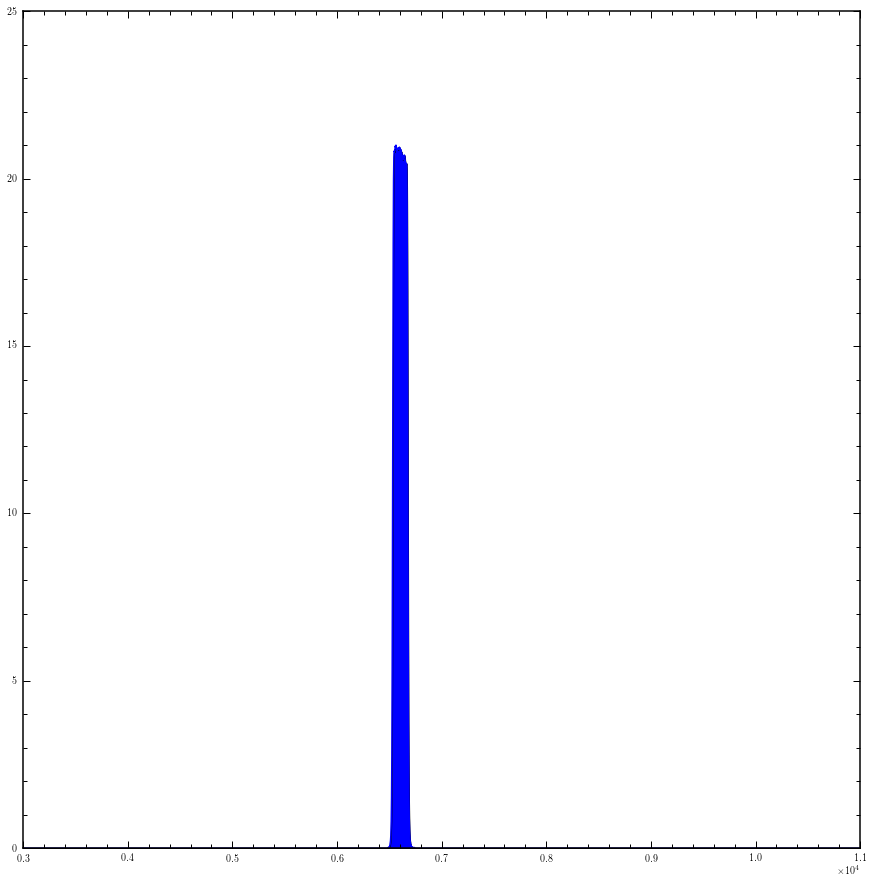

In [26]:
filt = jplus.tools.fetch_jplus_filter('J0660', quiet=True)
mf = np.max(filt.throughput)
plt.plot(filt.wave,filt.throughput/mf *21)
plt.fill_between(filt.wave,filt.throughput/mf*21)

print dataspec.keys()

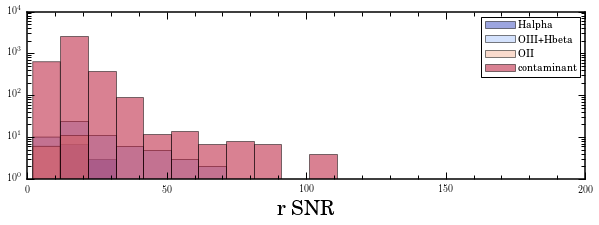

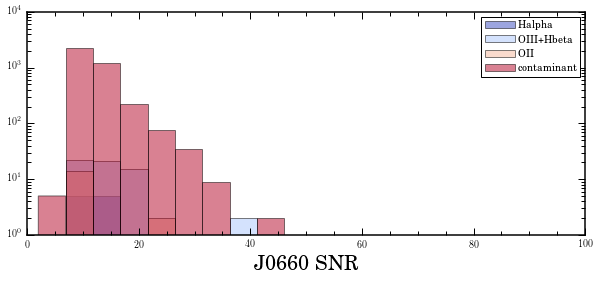

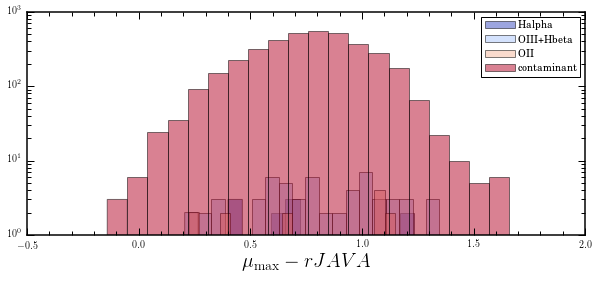

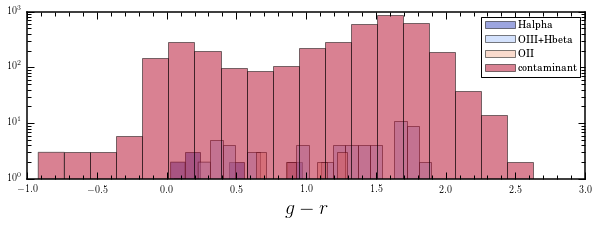

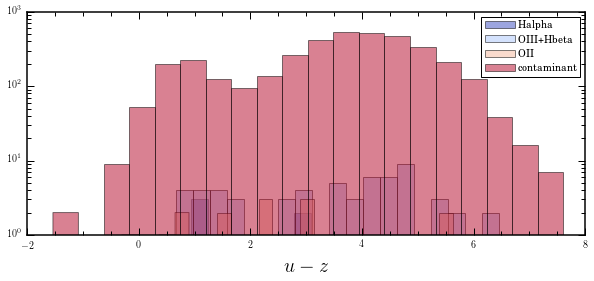

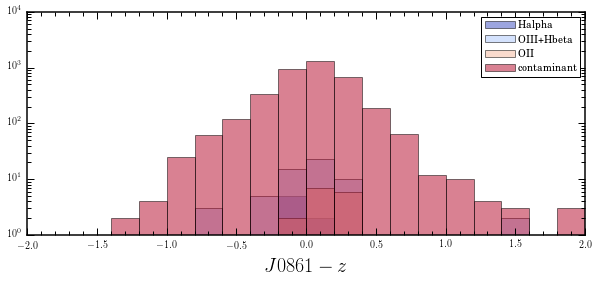

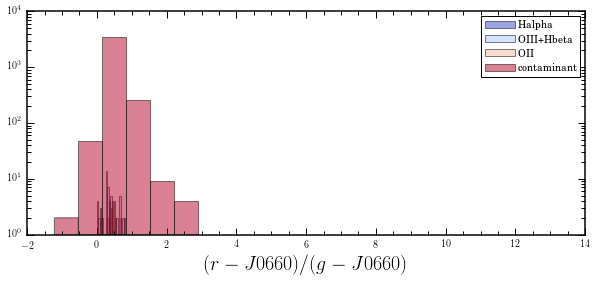

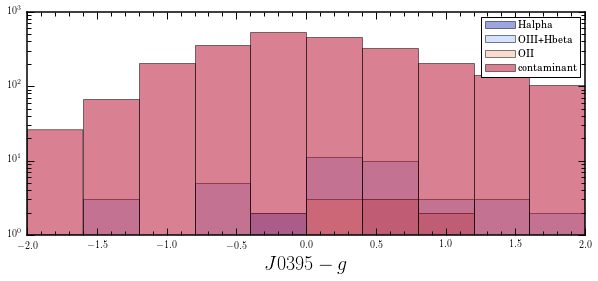

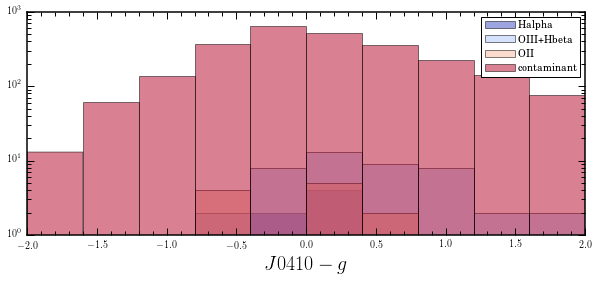

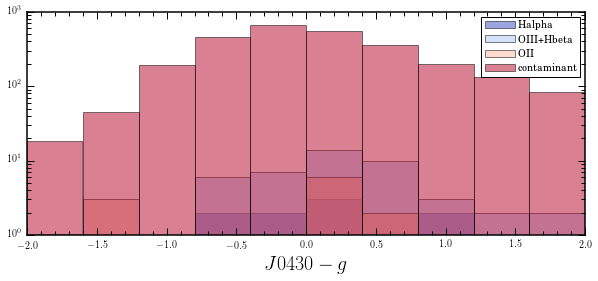

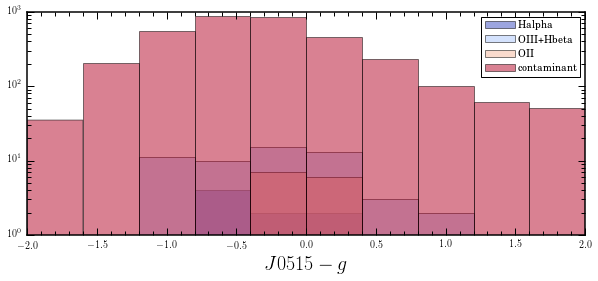

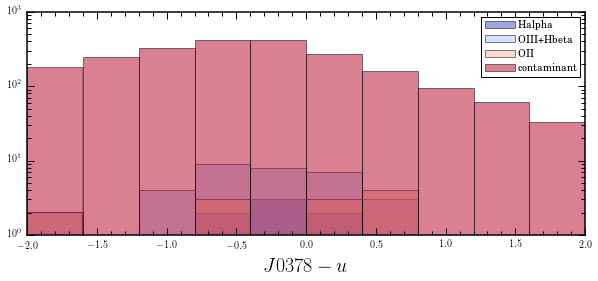

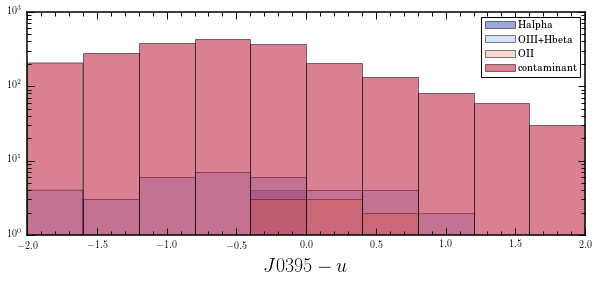

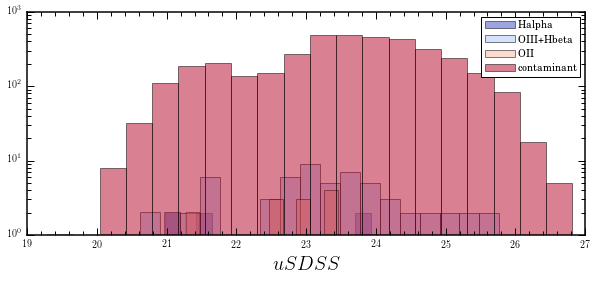

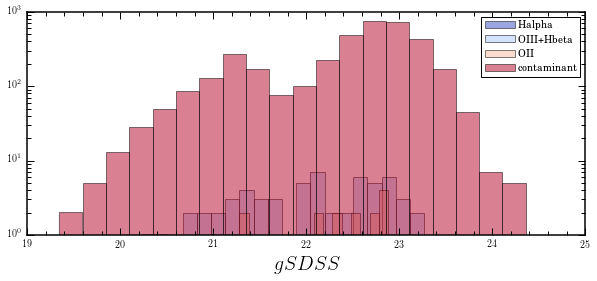

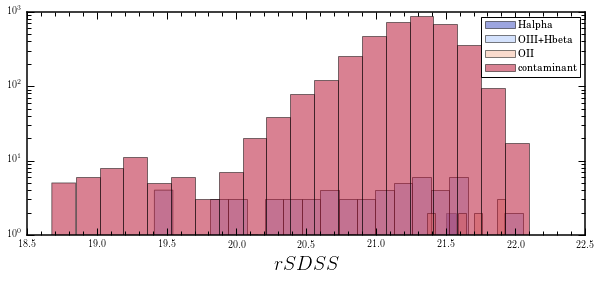

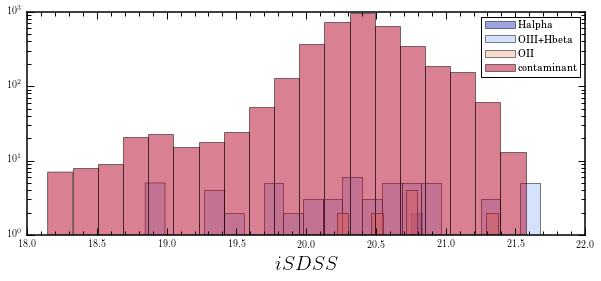

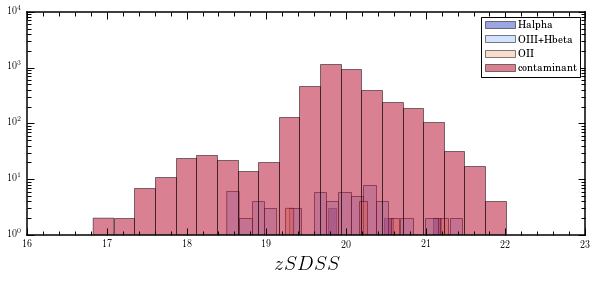

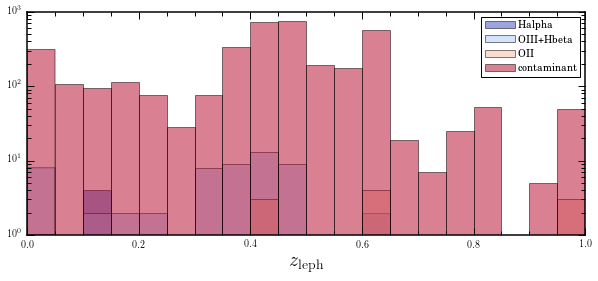

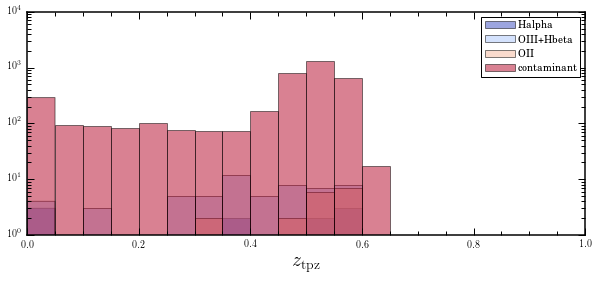

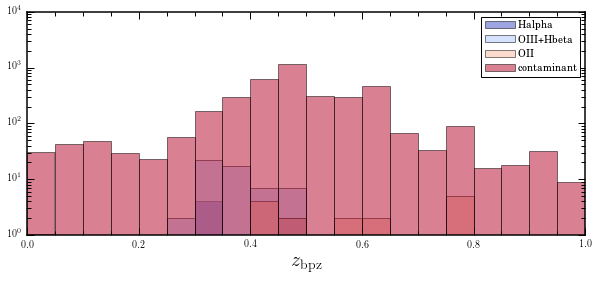

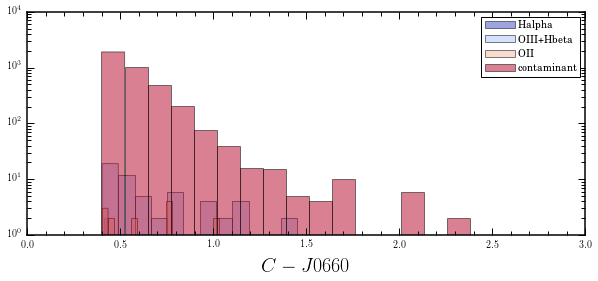

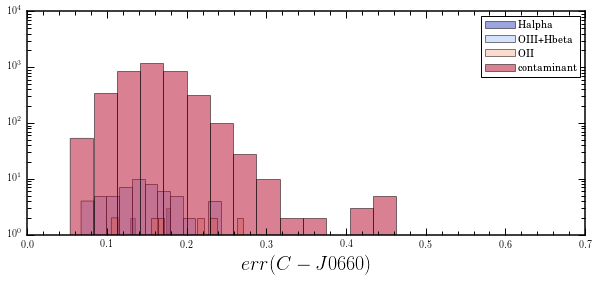

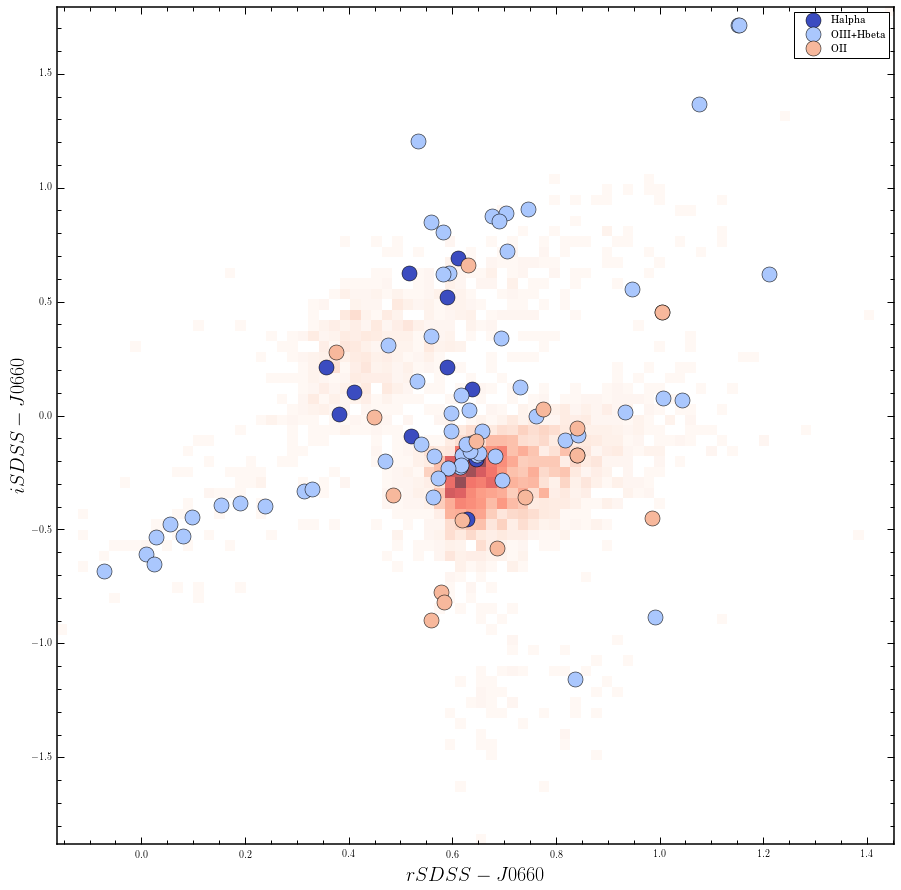

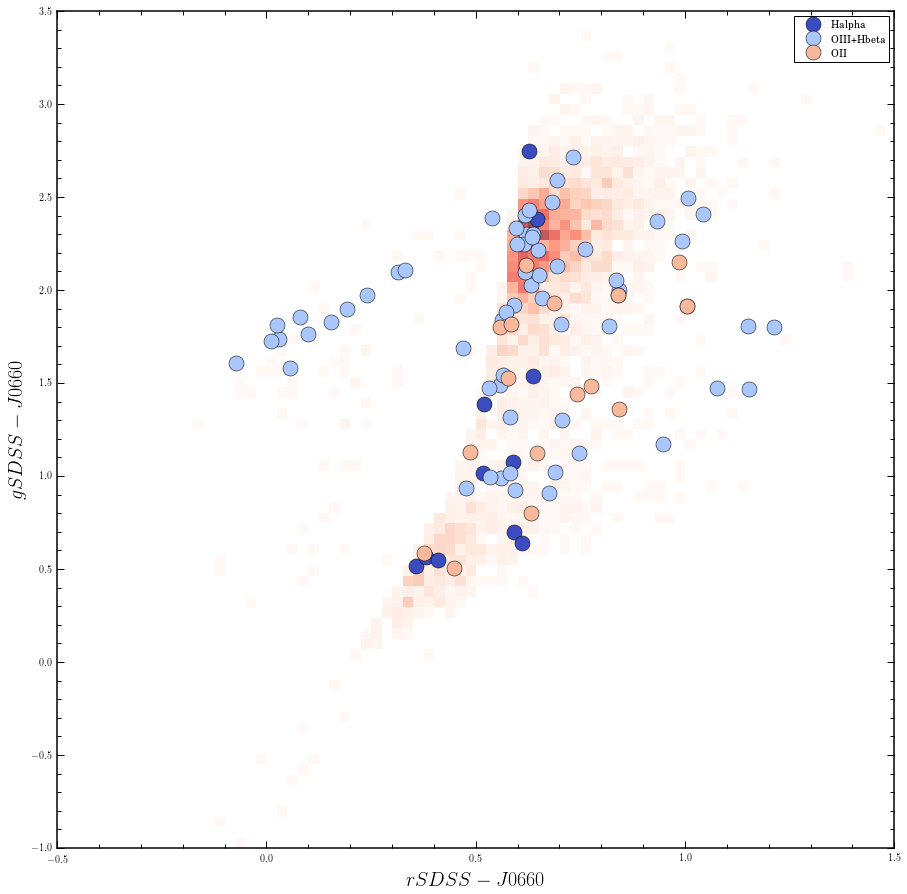

In [27]:
# Plot distribution of some features for all classes
suff = 'SDSS'
snr = 1./dataspec['r'+suff][:,1]
snr_ha = 1./dataspec['J0660'][:,1]

#classes_names = ['Halpha', 'OIII', 'Hbeta','OII']
classes_names = ['Halpha', 'OIII+Hbeta','OII', 'contaminant']
colors = plt.cm.coolwarm(np.linspace(0,1,len(classes_names)))
iic = 0
plt.figure(1,figsize=(10,3))

for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(snr[mask], bins=20, color=colors[iic], alpha=0.5, label=ic, range=[2,200])
    iic += 1
    
plt.xlabel('r SNR',fontsize=20)
plt.xlim([0,200])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure(2,figsize=(10,4))

iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(snr_ha[mask], bins=20, color=colors[iic], alpha=0.5, label=ic, range=[2,100])
    iic += 1

plt.xlabel('J0660 SNR',fontsize=20)
plt.xlim([0,100])
plt.legend()
plt.yscale('log', nonposy='clip')


plt.figure(3,figsize=(10,4))

iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['mu_max_r'][mask]-dataspec['rJAVA'][mask,0], bins=20, color=colors[iic], alpha=0.5, label=ic)
    iic += 1

plt.xlabel(r'$\mu_{\rm max}- rJAVA$',fontsize=20)
#plt.xlim([0,100])
plt.legend()
plt.yscale('log', nonposy='clip')

#plt.figure(4,figsize=(10,4))
#suff = 'SDSS'

#iic= 0
#for ic in classes_names:
#    mask = np.asarray(dataspec['class']) == ic
#    plt.hist(dataspec['dm_j0660'][mask], bins=20, color=colors[iic], alpha=0.5, label=ic,range=[0,2])
#    iic += 1

#plt.xlabel(r'$C^{r,g} - J0660$',fontsize=20)
#plt.xlim([-0.5,2])
#plt.legend()
#plt.yscale('log', nonposy='clip')

plt.figure(5,figsize=(10,3))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['g'+suff][mask,0] - dataspec['r'+suff][mask,0], bins=20, color=colors[iic], alpha=0.5, label=ic)#,range=[0,2])
    iic += 1

plt.xlabel(r'$g-r$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure(6,figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['u'+suff][mask,0] - dataspec['z'+suff][mask,0], bins=20, color=colors[iic], alpha=0.5, label=ic)#,range=[0,2])
    iic += 1

plt.xlabel(r'$u-z$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure(7,figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['J0861'][mask,0] - dataspec['z'+suff][mask,0], bins=20, color=colors[iic], alpha=0.5, label=ic,range=[-2,2])
    iic += 1

plt.xlabel(r'$J0861-z$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure(8,figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    right_col = dataspec['r'+suff][mask,0]-dataspec['J0660'][mask,0]
    left_col = dataspec['g'+suff][mask,0]-dataspec['J0660'][mask,0]
    plt.hist(right_col/left_col, bins=20, color=colors[iic], alpha=0.5, label=ic)
    iic += 1

plt.xlabel(r'$(r-J0660)/(g-J0660)$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('j0395-g',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['J0395'][mask,0] - dataspec['g'+suff][mask,0], bins=10, color=colors[iic], alpha=0.5, 
             label=ic, range=[-2,2])
    iic += 1

plt.xlabel(r'$J0395-g$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('j0410-g',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['J0410'][mask,0] - dataspec['g'+suff][mask,0], bins=10, color=colors[iic], alpha=0.5, 
             label=ic, range=[-2,2])
    iic += 1

plt.xlabel(r'$J0410-g$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('j0430-g',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['J0430'][mask,0] - dataspec['g'+suff][mask,0], bins=10, color=colors[iic], alpha=0.5, 
             label=ic, range=[-2,2])
    iic += 1

plt.xlabel(r'$J0430-g$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('j0515-g',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['J0515'][mask,0] - dataspec['g'+suff][mask,0], bins=10, color=colors[iic], alpha=0.5, 
             label=ic, range=[-2,2])
    iic += 1

plt.xlabel(r'$J0515-g$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('j0378-u',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['J0378'][mask,0] - dataspec['u'+suff][mask,0], bins=10, color=colors[iic], alpha=0.5, 
             label=ic, range=[-2,2])
    iic += 1

plt.xlabel(r'$J0378-u$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('j0395-u',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['J0395'][mask,0] - dataspec['u'+suff][mask,0], bins=10, color=colors[iic], alpha=0.5, 
             label=ic, range=[-2,2])
    iic += 1

plt.xlabel(r'$J0395-u$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')



bb = ['u','g','r','i','z']

for band in bb:
    plt.figure(band,figsize=(10,4))


    iic= 0
    for ic in classes_names:
        mask = np.asarray(dataspec['class']) == ic
        plt.hist(dataspec[band+suff][mask,0] , bins=20, color=colors[iic], alpha=0.5, label=ic)
        iic += 1

    plt.xlabel(r'$%s%s$'%(band,suff),fontsize=20)
    #plt.xlim([-0.5,2])
    plt.legend()
    plt.yscale('log', nonposy='clip')



pzarr = ['leph', 'tpz', 'bpz']    

for pz in pzarr:
    plt.figure(pz,figsize=(10,4))


    iic= 0
    for ic in classes_names:
        mask = np.asarray(dataspec['class']) == ic
        plt.hist(dataspec['photoz_'+pz][mask], bins=20, color=colors[iic], alpha=0.5, label=ic, range=[0,1])
        iic += 1

    plt.xlabel(r'$z_{\rm %s}$'%pz,fontsize=20)
    #plt.xlim([-0.5,2])
    plt.legend()
    plt.yscale('log', nonposy='clip')


    
plt.figure('dm_j0660',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['dm_j0660'][mask], bins=20, color=colors[iic], alpha=0.5, label=ic)
    iic += 1

plt.xlabel(r'$C - J0660$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('dm_j0660_err',figsize=(10,4))


iic= 0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    plt.hist(dataspec['dm_j0660_err'][mask], bins=20, color=colors[iic], alpha=0.5, label=ic)
    iic += 1

plt.xlabel(r'$err(C - J0660)$',fontsize=20)
#plt.xlim([-0.5,2])
plt.legend()
plt.yscale('log', nonposy='clip')

plt.figure('cc1')

from matplotlib.colors import LogNorm

iic =0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    if ic == 'contaminant':
        counts, ybins, xbins, image = plt.hist2d(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['i'+suff][mask,0] - dataspec['J0660'][mask,0], bins=80, 
                                         cmap=plt.cm.Reds, normed=LogNorm(), 
                                         cmin=0.01, label='SDSS contaminants', alpha=0.7)
        plt.legend(loc='upper left')
    else:
        plt.plot(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['i'+suff][mask,0] - dataspec['J0660'][mask,0],
             'o',color=colors[iic],alpha=1,label=ic,markersize=15)
    iic += 1

plt.xlabel(r'$rSDSS-J0660$',fontsize=20)
plt.ylabel(r'$iSDSS-J0660$',fontsize=20)

#plt.xlim([-0.5,2])
plt.legend()
             
plt.figure('cc2')

from matplotlib.colors import LogNorm

xr = [-.5,1.5]
yr = [-1,3.5]

iic =0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    if ic == 'contaminant':
        counts, ybins, xbins, image = plt.hist2d(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['g'+suff][mask,0] - dataspec['J0660'][mask,0], bins=80, 
                                         cmap=plt.cm.Reds, normed=LogNorm(), 
                                         cmin=0.01, label='SDSS contaminants', alpha=0.7,
                                                range=[xr,yr])
        plt.legend(loc='upper left')
    else:
        plt.plot(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['g'+suff][mask,0] - dataspec['J0660'][mask,0],
             'o',color=colors[iic],alpha=1,label=ic,markersize=15)
    iic += 1
plt.ylim(yr)
plt.xlim(xr)
plt.xlabel(r'$r%s-J0660$'%suff,fontsize=20)
plt.ylabel(r'$g%s-J0660$'%suff,fontsize=20)



#plt.xlim([-0.5,2])
plt.legend()



   

In [28]:
#Focusing on synthetic photometry
apply_mask = True
synth_spec = []


suff ='SDSS'
photo_spec['dm_j0660'], Fline, Fcont = mtools.gen_3fm(photo_spec['J0660'][:,0],  
                    photo_spec['r'+suff][:,0], photo_spec['g'+suff][:,0], 
                    Broad_NoLineName='g'+suff)



mask = photo_spec['dm_j0660'] > 0.1

eboss_id = []
vvds_id  = []
nspec = len(allspec)
print allspec[0].keys()
for i in range(nspec):
    synth_spec.append(i)
    if allspec[i]['survey'] == 'eBOSS':
        eboss_id.append(i)
    elif allspec[i]['survey'] == 'VVDS-F02_UDEEP':
        vvds_id.append(i)
    else:
        print allspec[i]['survey']
        
print len(eboss_id), len(vvds_id)
        
gtype = ['OIII', 'OII', 'Hbeta']
gtdict = {}

for gt in gtype:
    gtdict[gt] = []
    for sp in synth_spec:
        if allspec[sp]['name'] == gt:
            if mask[sp]:
                gtdict[gt].append(sp)

for gtype in gtdict.keys():
    print 'Number of %s: %d'% (gtype, len(gtdict[gtype]))




['w', 'flux', 'survey', 'file', 'z', 'name']
587 61
Number of OIII: 61
Number of Hbeta: 22
Number of OII: 254


In [29]:
print photo_spec.keys()


['uJAVA', 'rSDSS', 'gJAVA', 'iSDSS', 'iJAVA', 'gSDSS', 'J0395', 'zSDSS', 'J0378', 'J0430', 'uSDSS', 'dm_j0660', 'J0660', 'J0410', 'zJAVA', 'J0515', 'J0861', 'rJAVA']


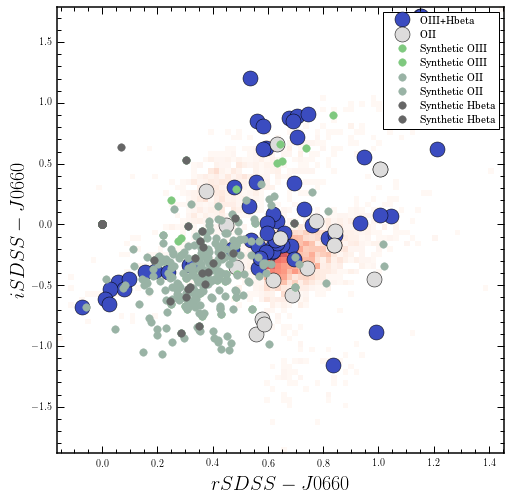

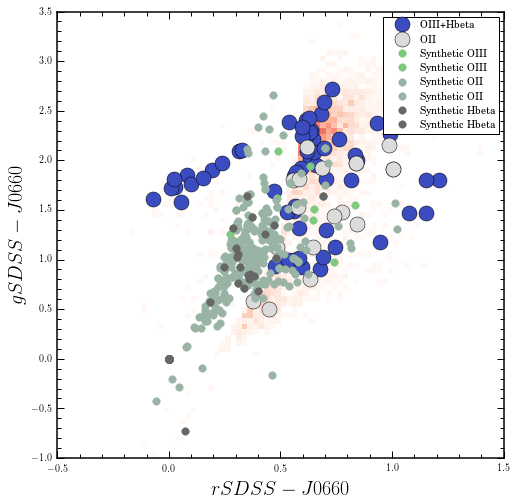

In [30]:
# Explore those colour-colour plots again now with synthetic photometry and adding
# cuts to reduce the fraction of contaminants

classes_names = ['OIII+Hbeta','OII', 'contaminant']

plt.figure('ccx1',figsize=(8,8))
colors = plt.cm.coolwarm(np.linspace(0,1,len(classes_names)))
colors_synt = plt.cm.Accent(np.linspace(0,1,3))
suff = 'SDSS'
gtype = ['OIII', 'OII', 'Hbeta']



from matplotlib.colors import LogNorm

iic =0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    if ic == 'contaminant':
        counts, ybins, xbins, image = plt.hist2d(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['i'+suff][mask,0] - dataspec['J0660'][mask,0], bins=80, 
                                         cmap=plt.cm.Reds, normed=LogNorm(), 
                                         cmin=0.01, label='SDSS contaminants', alpha=0.7)
        #plt.legend(loc='upper left')
    else:
        plt.plot(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['i'+suff][mask,0] - dataspec['J0660'][mask,0],
             'o',color=colors[iic],alpha=1,label=ic,markersize=15)
    iic += 1

# Add synthetic photometry from eBOSS
iic = 0
for ic in gtype:
    iid = gtdict[ic]
    plt.plot(photo_spec['r'+suff][iid] - photo_spec['J0660'][iid], 
             photo_spec['i'+suff][iid] - photo_spec['J0660'][iid],
             '.',color=colors_synt[iic],alpha=1,label='Synthetic %s'%ic,markersize=15)

    iic += 1
    
plt.xlabel(r'$r%s-J0660$'%suff,fontsize=20)
plt.ylabel(r'$i%s-J0660$'%suff,fontsize=20)

#plt.xlim([-0.5,2])
plt.legend()
             
plt.figure('cc2',figsize=(8,8))

from matplotlib.colors import LogNorm

xr = [-.5,1.5]
yr = [-1,3.5]

iic =0
for ic in classes_names:
    mask = np.asarray(dataspec['class']) == ic
    if ic == 'contaminant':
        counts, ybins, xbins, image = plt.hist2d(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['g'+suff][mask,0] - dataspec['J0660'][mask,0], bins=80, 
                                         cmap=plt.cm.Reds, normed=LogNorm(), 
                                         cmin=0.01, label='SDSS contaminants', alpha=0.7,
                                                range=[xr,yr])
        #plt.legend(loc='upper left')
    else:
        plt.plot(dataspec['r'+suff][mask,0] - dataspec['J0660'][mask,0],
             dataspec['g'+suff][mask,0] - dataspec['J0660'][mask,0],
             'o',color=colors[iic],alpha=1,label=ic,markersize=15)
    iic += 1

iic = 0
for ic in gtype:
    iid = gtdict[ic]
    plt.plot(photo_spec['r'+suff][iid] - photo_spec['J0660'][iid], 
             photo_spec['g'+suff][iid] - photo_spec['J0660'][iid],
             '.',color=colors_synt[iic],alpha=1,label='Synthetic %s'%ic,markersize=15)

    iic += 1


    
plt.ylim(yr)
plt.xlim(xr)
plt.xlabel(r'$r%s-J0660$'%suff,fontsize=20)
plt.ylabel(r'$g%s-J0660$'%suff,fontsize=20)



#plt.xlim([-0.5,2])
plt.legend()



In [31]:
# additional cuts on training set to reduce contaminants
suff ='SDSS'
gj0660 = 2.0
mask2 = (dataspec['g'+suff][:,0] - dataspec['J0660'][:,0]) < gj0660

#dataspec_new = 

print 'old fraction of contaminants: %.3f'% ((0.0+len(np.where(np.asarray(dataspec['class']) == 'contaminant')[0]))/
                                             (0.0+len(dataspec['class'])))
print 'new fraction: %.3f'% ((0.0+len(np.where(np.array(mask2))[0]))/len(dataspec['class']))

print len(np.where(np.array(mask2))[0])


old fraction of contaminants: 0.977
new fraction: 0.390
1512


In [32]:
# This will add synthetic spectra to the dataset for training and testing
Add_Synthetic_to_DataSet = True

data_merged = {}

keys_to_copy = photo_spec.keys()
mask_sp = photo_spec['g'+suff][:,0] - photo_spec['J0660'][:,0] < gj0660

print gtype

for key in dataspec.keys():
    if type(dataspec[key]) is np.ndarray:
        data_merged[key] = dataspec[key][mask2].tolist() # first copy all dataspec into merged dataset
    else:
        data_merged[key] = np.array(dataspec[key])[mask2].tolist()
        
for gt in gtype: #for each new class
    iid = gtdict[gt]
    cname = 'OIII+Hbeta' if gt == 'Hbeta' or gt == 'OIII' else 'OII'
    for _i in iid: # and each new object
        if mask_sp[_i]: # if object is not masked
            for key in keys_to_copy: #append on each key
                data_merged[key].append(photo_spec[key][_i])
            data_merged['class'].append(cname)

data_merged['index'] = np.arange(len(data_merged['class']))
data_merged['class'] = np.array(data_merged['class']) 

print 'converting lists to arrays...'
for key in keys_to_copy:
    data_merged[key] = np.array(data_merged[key])


m_null = np.asarray(data_merged['class']) == 'contaminant'
m_z0  = np.asarray(data_merged['class']) == 'Halpha'
m_zp3 = np.asarray(data_merged['class']) == 'OIII+Hbeta'
#m_zp35 = np.asarray(dataspec['class']) == 'Hbeta'
m_zp7 = np.asarray(data_merged['class']) == 'OII'

print m_null
print data_merged['class']
n_null = len(data_merged['class'][m_null])
nz0  = len(data_merged['class'][m_z0])
nzp3 = len(data_merged['class'][m_zp3])  
#nzp35 = len(dataspec['z_spec'][m_zp35])  
nzp7 = len(data_merged['class'][m_zp7])
print 'Number of Halpha emitters: %ld' % nz0
print 'Number of OIII+Hbeta emitters: %ld' % nzp3       
#print 'Number of Hbeta emitters: %ld' % nzp35
print 'Number of OII emitters: %ld' % nzp7
print 'Number of contaminants: %ld' % n_null



['OIII', 'OII', 'Hbeta']
converting lists to arrays...
[False False False ... False False False]
['OIII+Hbeta' 'OIII+Hbeta' 'OII' ... 'OIII+Hbeta' 'OIII+Hbeta'
 'OIII+Hbeta']
Number of Halpha emitters: 9
Number of OIII+Hbeta emitters: 116
Number of OII emitters: 261
Number of contaminants: 1452


In [33]:
# This function retrieves a features list for a single object.

def prepare_sample(data, index, sample_amp = False, 
                   sample_error = False, sample_type = 'All_Mags', 
                   filters='J-PLUS'):
    
    BBNames = ['u','g','r','i','z']
    NBNames = ['J0378', 'J0395', 'J0410','J0430','J0515','J0660','J0861']
    
    suff = 'JAVA' if filters == 'J-PLUS' else 'SDSS'
    
    filternames = [ 'J0378','J0395', 'J0410','J0430','J0515', 'J0660',
                   'J0861','u'+suff, 'g'+suff, 'r'+suff, 'i'+suff,'z'+suff]
        
        
    
    flist = [] # filterslist
    ferrlist = []
    nfilters = len(filternames)
    a_r = data['r'+suff][index,0]
    amplitude = np.random.uniform(18, 23) if sample_amp else a_r  # amplitude scaling change for r-filter
    DeltaM = amplitude - a_r
    for ff in filternames:
        if sample_error and data[ff][index,1] > 0:
            flist.append(np.random.normal(data[ff][index,0], data[ff][index,1]) + DeltaM)  # errors distribute like a gaussian (?)
        else:
            flist.append(data[ff][index,0] + DeltaM)
        ferrlist.append(data[ff][index,1])
    
    sample = [] # The sample's features
    
#    dm_J0515 = mtools.gen_3fm(data['J0515'][index,0], data['g'+suff][index,0], 
#                          data['r'+suff][index,0],Broad_NoLineName='rSDSS', LineFilterName='J0515', 
#                          Broad_LineName='gSDSS')
#    err_dm_J0515 = mtools.gen_3fm_err(data['J0515'][index,0], data['J0515'][index,1], data['g'+suff][index,0], 
#                                      data['g'+suff][index,1], data['r'+suff][index,0], data['r'+suff][index,1],
#                                      Broad_NoLineName='rSDSS')


#    dm_J0378 = mtools.gen_3fm(data['J0378'][index,0], data['u'+suff][index,0], 
#                          data['g'+suff][index,0],Broad_NoLineName='gSDSS', LineFilterName='J0378', 
#                              Broad_LineName='uJAVA')
##    err_dm_J0378 = mtools.gen_3fm_err(data['J0378'][index,0], data['J0378'][index,1], data['u'+suff][index,0], 
#                                      data['u'+suff][index,1],data['g'+suff][index,0], data['g'+suff][index,1],
#                                      Broad_NoLineName='gSDSS')

#    dm_J0861 = mtools.gen_3fm(data['J0861'][index,0], data['z'+suff][index,0], 
#                          data['i'+suff][index,0],Broad_NoLineName='iSDSS', 
#                          LineFilterName='J0861', Broad_LineName='zSDSS')

#    err_dm_J0861 = mtools.gen_3fm_err(data['J0861'][index,0], data['J0861'][index,1], data['z'+suff][index,0], 
#                          data['z'+suff][index,1],data['i'+suff][index,0], data['i'+suff][index,1],
#                          Broad_NoLineName='iSDSS')

#    dm_J0660 = mtools.gen_3fm(data['J0660'][index,0], data['r'+suff][index,0], 
#                          data['g'+suff][index,0],Broad_NoLineName='gSDSS', 
#                          LineFilterName='J0660', Broad_LineName='rSDSS')

    dm_J0660 = data['dm_j0660'][index]

#    err_dm_J0660 = mtools.gen_3fm_err(data['J0660'][index,0], data['J0660'][index,1], data['r'+suff][index,0], 
#                          data['r'+suff][index,1],data['g'+suff][index,0], data['g'+suff][index,1],
#                          Broad_NoLineName='gSDSS')

    
    # Here I should get creative
    if sample_type == 'All_Mags':
        sample = flist # All individual filters
    if sample_type == 'All_Mags_mumax':
        for i in range(nfilters):
            sample.append(flist[i])
        sample.append(data['mu_max_r'][index] - data['rJAVA'][index,0])
        #sample.append(data['cstar'][index])
#        sample.append(data['pz_bpz'][index])
    if sample_type == 'Colors':
        for i in range(nfilters):
            sample.append(flist[i])
            for j in range(nfilters):
                if i != j:
                    sample.append(flist[i] - flist[j])
                   
    if sample_type == 'All':
        for i in range(nfilters):
            sample.append(flist[i])
        sample.append(data['mu_max_r'][index])
        #sample.append(data['cstar'][index])
        sample.append(data['pz_bpz'][index])
        for i in range(nfilters):
            sample.append(flist[i])
            for j in range(nfilters):
                if i != j:
                    sample.append(flist[i] - flist[j]) 
    if sample_type == 'dm':
        # Delta-m and SNR of deltaMs...
        sample=[#dm_J0515, #1./err_dm_J0515,
                #dm_J0378, #1./err_dm_J0378,
                #dm_J0861#, 1./err_dm_J0861
               dm_J0660]#, err_dm_J0660 ]
                 #data['dm'][index],data['err_dm'][index]
                 #]
        #sample.append(data['mu_max_r'][index] - data['rJAVA'][index,0])
        
    
        for fff in BBNames:
            sample.append(np.random.normal(data[fff+suff][index,0], data[fff+suff][index,1]) + DeltaM
            if sample_error and data[fff+suff][index,1] > 0 else data[fff+suff][index,0] + DeltaM)
        
        for nb in NBNames:
            sample.append(np.random.normal(data[nb][index,0], data[nb][index,1]) + DeltaM
            if sample_error and data[nb][index,1] > 0 else data[nb][index,0] + DeltaM)

        
        #u-g
        sample.append(np.random.normal(data['u'+suff][index,0], data['u'+suff][index,1])-
                      np.random.normal(data['g'+suff][index,0], data['g'+suff][index,1])
                      if sample_error and data['g'+suff][index,1] > 1 else 
                      data['u'+suff][index,0]-data['g'+suff][index,0])
        
        #g-r
        sample.append(np.random.normal(data['g'+suff][index,0], data['g'+suff][index,1])-
                      np.random.normal(data['r'+suff][index,0], data['r'+suff][index,1])
                      if sample_error and data['g'+suff][index,1] > 0 else 
                      data['g'+suff][index,0]-data['r'+suff][index,0])

        #r-i
        sample.append(np.random.normal(data['r'+suff][index,0], data['r'+suff][index,1])-
                      np.random.normal(data['i'+suff][index,0], data['i'+suff][index,1])
                      if sample_error and data['r'+suff][index,1] > 0 
                      else data['r'+suff][index,0]-data['i'+suff][index,0])

        #i-z
        sample.append(np.random.normal(data['i'+suff][index,0], data['i'+suff][index,1])-
                      np.random.normal(data['z'+suff][index,0], data['z'+suff][index,1])
                      if sample_error and data['r'+suff][index,1] > 0
                      else data['i'+suff][index,0]-data['z'+suff][index,0])

        #u-z
        sample.append(np.random.normal(data['u'+suff][index,0], data['u'+suff][index,1])-
                    np.random.normal(data['z'+suff][index,0], data['z'+suff][index,1])
                      if sample_error and data['r'+suff][index,1] > 0 else 
                      data['u'+suff][index,0]-data['z'+suff][index,0])
        
        #r-z
        sample.append(np.random.normal(data['r'+suff][index,0], data['r'+suff][index,1])-
                     np.random.normal(data['z'+suff][index,0], data['z'+suff][index,1])
                      if sample_error  and data['r'+suff][index,1] > 0
                      else data['r'+suff][index,0]-data['z'+suff][index,0])
        
        
        # colors including NBs
        
        #
        
        
        
        #SNR in r-band
        #sample.append(1./data['r'+suff][index,1])
        #SNR in J0660 band
        #sample.append(1./data['J0660'][index,1])
        
        # r-band
        #sample.append(np.random.normal(data['r'+suff][index,0] if sample_error 
        #                            and data['r'+suff][index,1] > 0 else data['r'+suff][index,0]))
        #g-band
        #sample.append(np.random.normal(data['g'+suff][index,0] if sample_error else data['g'+suff][index,0]))
        
        
        
    return sample



In [34]:
dset = data_merged  #use dataspec for xmatches only, data_merged to include synthetic photometry 


Compute_Dataset = True   # if False it reads a dataset from a file

Training_set_class_frac = 1 # a fraction X of the less abundant determines the number of objects per class in the training set.
Sampling_errors         = 2  # Each training galaxy is resampled X times using its errors


# Set only one of these to True
Sample_Small_Only = False       # If True, it will resample only the class with the smallest sample
Sample_Balancing  = True        # All classes are resampled but the end result is balanced
UseFixedNum       = False       # Use a fixed number of objects per class

# indices of different categories of objects
id_z0   = dset['index'][m_z0] 
id_z0p3 = dset['index'][m_zp3]
#id_z0p35 = dataspec['index'][m_zp35]
id_z0p7 = dset['index'][m_zp7]
id_null = dset['index'][m_null]

#nzarr = [nz0, nzp3, nzp35, nzp7]
nzarr = [nzp3, nzp7, n_null]
min_class = np.min(nzarr)
id_min    = np.argmin(nzarr)
id_max    = np.argmax(nzarr)

MaxClass = Sampling_errors * nzarr[id_max] 

if Sample_Balancing:
    print 'MaxClass = %d'%MaxClass

    balance_factors= [int((MaxClass+0.)/i) for i in nzarr]

if UseFixedNum:
    numperclass = int(min_class*Training_set_class_frac)
    print 'number of objects in training set per class before sampling errors: %d'%numperclass
    print 'number of objects left for validation: %d'%(ngals_tot-numperclass*3)
    
# Randomised lists:
ran_idz0 = np.random.permutation(id_z0)
ran_idz0p3 = np.random.permutation(id_z0p3)    
#ran_idz0p35 = np.random.permutation(id_z0p35)    
ran_idz0p7 = np.random.permutation(id_z0p7)
ran_id_null = np.random.permutation(id_null)

#id_arr = [ran_idz0, ran_idz0p3, ran_idz0p35, ran_idz0p7]
id_arr = [ran_idz0p3, ran_idz0p7, ran_id_null]

training_features = []
training_class    = []

dataset_features = []
dataset_class    = []

validate_features = []
validate_class    = []


sample_type='dm'
filterset = 'SDSS'

if Compute_Dataset:

    DoSampling = True if Sampling_errors >= 1 else False

    iid = 0
    for id_obj in id_arr:
        nid = numperclass if UseFixedNum else int(len(id_obj))

        if Sample_Small_Only:
            DoSampling = True if (Sampling_errors >= 1) and (iid == id_min) else False
            Serr = 1
        else:
            Serr = Sampling_errors

        if Sample_Balancing:
            DoSampling = True
            Serr = balance_factors[iid]
            print 'Balancing sample %d with resampling %d'% (iid, Serr)
            if Serr == 1:
                DoSampling = False # do not resample the largest class
                
        iclass = 0
        for i in range(nid):
            for j in range(Serr):
                dataset_features.append(prepare_sample(dset, id_obj[i], sample_error=DoSampling, sample_amp = DoSampling, 
                                                        sample_type=sample_type, filters=filterset))
                dataset_class.append(dset['class'][id_obj[i]])
                iclass += 1
        iid += 1
        print 'Number of elements in class %d: %d'%(iid, iclass)


    if Training_set_class_frac < 1:    # if == 1 then CV is used instead
        # randomize dataset:
        ndata = len(dataset_class)
        idsort = np.random.permutation(ndata) # permutation of indices
         
        idtr = int(ndata*Training_set_class_frac) #fraction used for training
        id_train = idsort[0:idtr]
        id_val   = idsort[idtr:]
        
        print idtr, ndata, len(id_val)
        training_features = [dataset_features[_idt] for _idt in id_train]
        training_class    = [dataset_class[_idt] for _idt in id_train]
        
        validate_features  = [dataset_features[_idv] for _idv in id_val]
        validate_class    = [dataset_class[_idv] for _idv in id_val]
    else:
        training_features = dataset_features
        training_class = dataset_class
        validate_features = dataset_features
        validate_class = dataset_class
        
        
        
    

    # Save dataset to a file
    datatrain = {'tfeatures':training_features,
                   'tclass'   :training_class,
                   'vfeatures':validate_features,
                   'vclass'   :validate_class}

    print 'saving file'
    print datatrain.keys()
    with open('dataset.data','wb') as outfile:
        pickle.dump(datatrain,outfile,protocol=pickle.HIGHEST_PROTOCOL)  

else:
    datatrain = pickle.load(open('dataset.data'))
    training_features = datatrain['tfeatures']
    training_class    = datatrain['tclass']
    validate_features = datatrain['vfeatures']
    validate_class    = datatrain['vclass']
    

print 'number of objects in training set: %ld'%len(training_features)        
print 'number of objects in validation set: %ld'%len(validate_features)        

#for i in range(len(training_features)):
#    print training_features[i], training_class[i]
    
print 'Number of features: %ld' % len(training_features[0])
ntrain = len(training_features)     
nfeat = len(training_features[0])



MaxClass = 2904
Balancing sample 0 with resampling 25
Number of elements in class 1: 2900
Balancing sample 1 with resampling 11
Number of elements in class 2: 2871
Balancing sample 2 with resampling 2
Number of elements in class 3: 2904
saving file
['tfeatures', 'vclass', 'tclass', 'vfeatures']
number of objects in training set: 8675
number of objects in validation set: 8675
Number of features: 19


In [ ]:
# Save data for ML analysis elsewhere




In [ ]:
#Taken from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#mlcolors[index]
def summary_performance_plot(index,precision, recall, fscore, color, 
                             cnum, ctype, name,  gs, 
                             figname='summary', ylim = [.0, 1.1], thick= 3,lsize=20):
    
    
    ax = plt.subplot(gs[0])
    ax.plot(cnum, precision,'o-', label=name, color=color,linewidth=thick)
    ax.grid(True)
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(ctype)
    ax.set_title('Precision',fontsize=lsize)
    ax.set_xlim([-0.25,2.25])
    ax.set_ylim(ylim)
    ax.legend(loc='lower left',fontsize=lsize)
    
    ax.tick_params(axis='both', which='major', labelsize=lsize)
    ax.tick_params(axis='both', which='minor', labelsize=lsize)
    
    ax = plt.subplot(gs[1])
    ax.plot(cnum, recall,'o-', label=name, color=color,linewidth=thick)
    ax.grid(True)
    ax.set_xticks([0,1,2, 3])
    ax.set_xticklabels(ctype)
    ax.set_title('Recall',fontsize=lsize)
    ax.set_xlim([-0.25,2.25])
    ax.set_ylim(ylim)
    ax.set_yticklabels([])
    
    ax.tick_params(axis='both', which='major', labelsize=lsize)
    ax.tick_params(axis='both', which='minor', labelsize=lsize)
    if index == 0:
        ax.text(0.5,1.15, figname, fontsize=lsize, transform=ax.transAxes)
    
  #  ax.legend(loc='lower left',fontsize=10)
    
    ax = plt.subplot(gs[2])
    ax.plot(cnum, fscore,'o-', label=name, color=color, linewidth=thick)
    ax.grid(True)
    ax.set_xticks([0,1,2, 3])
    ax.set_xticklabels(ctype)
    ax.set_title('Fscore',fontsize=lsize)
    ax.set_xlim([-0.25,2.25])
    ax.set_ylim(ylim)
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=lsize)
    ax.tick_params(axis='both', which='minor', labelsize=lsize)

   # ax.legend(loc='lower left',fontsize=10)
    
    return
    

In [ ]:
# Run ML
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn import tree
from sklearn import svm 

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF 

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

import sklearn
print sklearn.__version__

In [ ]:
# First validate the training set
UseCV = False # Use Stratified-Cross-validation to optimise the use of the dataset
if UseCV:
    from sklearn.model_selection import StratifiedKFold
    
if Training_set_class_frac == 1: # Do the splitting automatically instead of defined as above
    traf, valf, trac, valc = train_test_split(
    training_features, training_class, test_size=0.2, random_state=None)
else:
    traf = training_features
    valf = validation_features
    trac = training_class
    valc = validation_class
    
Scaledata = True

if Scaledata:
    print 'scaling data...',
    scaler = StandardScaler()
    scaler.fit(traf)
    Traindata = scaler.transform(traf)
    Testdata  = scaler.transform(valf)
    print 'done'
else:
    Traindata = traf
    Testdata  = valf    

classifiers = {}

import numpy as np

nalpha = 10

a_arr = np.logspace(-3,0,num=nalpha)
niter = 1
iter_arr = np.linspace(1000,1000,niter)
nff = int(nfeat)
for aa in range(nalpha):
    for bbin in iter_arr:
        alpha = a_arr[aa]
        itt = bbin
        print alpha
        classifiers['MLP alpha=%.7f\niter=%d'%(alpha,itt)] = MLPClassifier(solver='lbfgs',
                                                hidden_layer_sizes=(nff),
                                                activation='relu', alpha=alpha,
                                                             random_state=3455, tol=1e-5, 
                                                              max_iter=itt)



cnum = [0, 1, 2]
#ctype = ['Halpha', 'OIII', 'Hbeta','OII']
ctype = ['OIII+Hbeta','OII','contaminant']
nclass = 1
mlcolors = plt.cm.Accent(np.linspace(0,1,nalpha+niter))

#plt.figure('summary')

plt.figure('performance')
plt.rcParams['figure.figsize'] = 15, 10
gs = gsc.GridSpec(1,3)
gs.update(wspace=0.0, right=1.5,top=0.6)

gs2 = gsc.GridSpec(1,3)
gs2.update(wspace=0.0, right=1.5,top=0.6)



iid = 0
for index in range(nalpha):
    for itt in iter_arr:
        alpha = a_arr[index]
        name = 'MLP alpha=%.7f\niter=%d'%(alpha,itt)
        sname = r'$\alpha=%.4f$'%alpha
        classifier = classifiers[name]
        print name
#        if UseCV:
#            skf = StratifiedKFold(n_splits=5)
#            ndata = len(Traindata)
#            id_data = np.ones(ndata)
#            for train, test in skf.split(Traindata, training_class):
            
#        else:
            
        classifier.fit(Traindata, trac)
        y_train = classifier.predict(Traindata)
        y_test  = classifier.predict(Testdata)

        precision, recall, fscore, support = metrics.precision_recall_fscore_support(trac, 
                                                                                     y_train, labels=ctype)
        color = mlcolors[index]
        plt.figure('performance')
        plt.rcParams['figure.figsize'] = 15, 10

        summary_performance_plot(index,precision, recall, fscore, color, cnum, ctype, sname,  gs, figname='Training', ylim=[0.7,1.05])

        precision, recall, fscore, support = metrics.precision_recall_fscore_support(valc, 
                                                                                     y_test, labels=ctype)
        color = mlcolors[iid]
        plt.figure('performance2')
        plt.rcParams['figure.figsize'] = 15, 10

        summary_performance_plot(index,precision, recall, fscore, color, cnum, ctype, sname,  gs2, figname='Validation', ylim=[0.7,1.05])
        iid += 1



In [ ]:
# Perform recursive feature elimination with cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

filterset = 'SDSS'

feat_data = []

best_alpha = 0.0022
best_iter  = 1000
ctype = ['OIII+Hbeta','OII','contaminant']

plt.figure('performance')
plt.rcParams['figure.figsize'] = 15, 10
gs = gsc.GridSpec(1,3)
gs.update(wspace=0.2, right=1.5,top=0.6)

gs2 = gsc.GridSpec(1,3)
gs2.update(wspace=0.0, right=1.5,top=0.6)


# Train again a specific classifier(s)

classifier = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(nff,nff),
                            activation='relu', alpha=best_alpha,
                            random_state=3455, tol=1e-5, 
                            max_iter=best_iter)

#rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2),
#              scoring='accuracy')
#rfecv.fit(Traindata, trac)

#print("Optimal number of features : %d" % rfecv.n_features_)

#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()





In [ ]:
# Now run the trained algorithm over the full J-PLUS set.
filterset = 'SDSS'

feat_data = []

best_alpha = 0.0022
best_iter  = 1000
ctype = ['OIII+Hbeta','OII','contaminant']

plt.figure('performance')
plt.rcParams['figure.figsize'] = 15, 10
gs = gsc.GridSpec(1,3)
gs.update(wspace=0.2, right=1.5,top=0.6)

gs2 = gsc.GridSpec(1,3)
gs2.update(wspace=0.0, right=1.5,top=0.6)


# Train again a specific classifier(s)

classifier = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(nff,nff),
                            activation='relu', alpha=best_alpha,
                            random_state=3455, tol=1e-5, 
                            max_iter=best_iter)

print 'training and testing again best classifier'
classifier.fit(Traindata, trac)
y_train = classifier.predict(Traindata)
y_test  = classifier.predict(Testdata)


# plot performance of this specific classifier


precision, recall, fscore, support = metrics.precision_recall_fscore_support(trac, 
                                                                             y_train, labels=ctype)
color = mlcolors[2]
plt.figure('performance')
plt.rcParams['figure.figsize'] = 15, 10

summary_performance_plot(0,precision, recall, fscore, color, cnum, ctype, '',  gs, 
                         figname='', ylim=[0.7,1.05], thick=5)

precision, recall, fscore, support = metrics.precision_recall_fscore_support(valc, 
                                                                             y_test, labels=ctype)
#plt.figure('performance2')
#plt.rcParams['figure.figsize'] = 15, 10

summary_performance_plot(0,precision, recall, fscore, mlcolors[3], cnum, ctype, '',  gs, 
                         figname='', ylim=[0.7,1.05],thick=5)
iid += 1

print 'preparing J-PLUS data'
for i in range(len(dcat['tile_id'])):
    feat_data.append(prepare_sample(dcat, i, 
                    sample_type='dm', filters=filterset))


if Scaledata:
    print 'scaling features'
    scaler = StandardScaler()
    scaler.fit(Traindata)
    fdata  = scaler.transform(feat_data)
else:
    fdata = feat_data

print 'running trained classifier'
pred = classifier.predict(fdata)
print 'done with %d objects'% len(dcat['tile_id'])






In [ ]:
# Write classification

pred_file = 'classification'
pred_dict ={'pred': pred, 'all':dcat}

with open(pred_file,'wb') as outfile:
        pickle.dump(pred_dict,outfile,protocol=pickle.HIGHEST_PROTOCOL)
        

In [ ]:
noii = len(np.where(np.asarray(pred) == 'OII')[0])
noiiihb = len(np.where(np.asarray(pred) == 'OIII+Hbeta')[0])
ncont = len(np.where(np.asarray(pred) == 'contaminant')[0])

print 'Number of\nOII emitters:%d\nOIII-HB emitters:%d\nContaminants:%d'%(
    noii,noiiihb,ncont)

print np.unique(np.asarray(training_class))
prob = classifier.predict_proba(feat_data)






In [ ]:
print classifier.classes_
from astropy.cosmology import Planck15

ld= Planck15.luminosity_distance(0.75).value

#compute LFs
mpc2cm= 3.08e24
ld *= mpc2cm
id_oii = np.asarray(pred) == 'OII'

gal_oii = jplus.tools.select_object(dcat,id_oii)



f_oii = gal_oii['F_j0660']

loii = f_oii * 4*np.pi*ld**2

min_oii = np.min(np.log10(loii))
max_oii = np.max(np.log10(loii))
lbin = 0.1
nbins = int(np.floor((max_oii-min_oii)/lbin+1))
print min_oii,max_oii
binarr = np.arange(nbins)*lbin + min_oii

phi, lbb = np.histogram(np.log10(loii),bins=nbins,range=[min_oii-lbin/2.,max_oii+lbin/2.])

depth = Planck15.comoving_distance(0.8) - Planck15.comoving_distance(0.74)
area_tile = (1.4*60)**2 #deg^2
ntiles = len(np.unique(dcat['tile_id']))
print 'ntiles %d'%ntiles
mask_factor = 0.8 #to be computed properly
area_survey = area_tile*ntiles*mask_factor*(Planck15.kpc_comoving_per_arcmin(0.77).value/(1e3))**2
volume = area_survey * depth.value
print volume

errs =np.sqrt(phi)/(volume * lbin)
print errs

plt.figure('LFOII',figsize=(8,8))
ax = plt.subplot(111)

ax.semilogy(binarr, phi/volume/lbin,'bo-',linewidth=2,markersize=15,label='J-PLUS',alpha=0.5)
ax.errorbar(binarr, phi/volume/lbin, yerr = errs, fmt='b,',alpha=0.5,elinewidth=3)
ax.set_ylabel(r'$\phi ({\rm d}\log L)^{-1}[{\rm Mpc^{-3}]$',fontsize=25)
ax.set_xlabel(r'$\log(L_{OII} [{\rm erg~s^{-1}}])$',fontsize=25)


fmockdata = 'data/z_0.7875'
fcomparatdata = 'data/z_0.7875_data'

mockphi = np.loadtxt(fmockdata)
dataphi = np.loadtxt(fcomparatdata)

ax.semilogy(mockphi[:,0],mockphi[:,1],'k--',linewidth=5,label='Mock (Izquierdo+18)')
ax.semilogy(dataphi[:,0],dataphi[:,1],'ro',markersize=10,label='Comparat+15',alpha=0.5)
ax.errorbar(dataphi[:,0],dataphi[:,1],yerr=[dataphi[:,5],dataphi[:,4]], fmt='r,',alpha=0.7,
            elinewidth=3)
ax.set_xlim([41,45])
ax.set_ylim([5e-9,1e-2])
ax.text(0.8,0.7,'z=0.75',transform=ax.transAxes,fontsize=20)
ax.legend(loc='upper right',fontsize=20)


In [ ]:
import pymangle
import pickle
generate_random_mask = True

if generate_random_mask:
    jpm_file = '/home/CEFCA/aaorsi/work/jplus_masks/jplus_dr1_masks.pol'
    print 'reading mangle file'
    jplus_mask = pymangle.mangle.Mangle(jpm_file)
    print 'generating randoms'
    jpran = jplus_mask.genrand(100000)
    ran_mask = {'coords':np.transpose([jpran[0], jpran[1]])}
else:    
    ranfile = 'random_mask.data'
    ran_mask = pickle.load(open(ranfile))

print ran_mask.keys()
tiles = jplus.datasets.fetch_jplus_tile_list(db='dr1',overwrite=False)

print tiles.keys()


In [ ]:
tile_scale = 1.40

def haversine_dist(ra1, dec1, ra2, dec2):
  th1 = np.pi/2. - dec1 * np.pi/180.0
  th2 = np.pi/2. - dec2 * np.pi/180.0

  ph1 = ra1 * np.pi/180.0
  ph2 = ra2 * np.pi/180.0

  dph = np.abs(ph1 - ph2)
  dth = np.abs(th1 - th2)

  harg = np.sin(dph/2)**2 + np.cos(ph1)*np.cos(ph2) * np.sin(dth/2.)**2

  return 2 *np.arcsin(np.sqrt(harg)) * 180./np.pi  # Return distance in degrees

#Get the mask tiles overlapping with ELGs
 
    
Load_rans=True
ranfile = 'ran_jplus'
if not Load_rans:
    print 'finding tile_id of random points...'
    nran = len(ran_mask['coords'])
    print 'initial number of randoms %ld' % nran
    ran_tile_id = np.zeros(nran)

    m = []
    for i in range(nran):
        darr = haversine_dist(ran_mask['coords'][i,0], ran_mask['coords'][i,1], 
                              tiles['ra'], tiles['dec'])
        idt2 = np.argsort(darr)[0]  
        ran_tile_id[i] = tiles['ref_tileID'][idt2] 
        m.append(True if darr[idt2] < 2*tile_scale else False)
        if i%10000 == 0:
            print float(i)/float(nran)

    randict = jplus.tools.select_object(ran_mask, m)
    randict['tile_id'] = ran_tile_id[m]

    print 'Returning only random mask tiles with overlapping tiles with ELGs'

    unique_tiles = reduce(np.intersect1d, (np.unique(dcat['tile_id']), 
                                           np.unique(randict['tile_id'])))
    print 'number of intersecting tiles', len(unique_tiles)

    ran_mask   = jplus.tools.select_object(randict, np.array([item in unique_tiles for item in randict['tile_id'] ]))
    print 'Final number of random points in mask:%ld'%len(ran_mask['tile_id'])
    with open(ranfile,'wb') as outfile:
        pickle.dump(ran_mask,outfile,protocol=pickle.HIGHEST_PROTOCOL)   
    
else:
    ran_mask = pickle.load(open(ranfile))


In [ ]:
ran_mask.keys()

In [ ]:
print ran_mask['coords'][0:2], ran_mask['tile_id'][0:2]
print gal_oii['coords'][0:2]

In [ ]:
# Raw 2PCF:

readw = True

import CosmoBolognaLib as cbl
cosmology = cbl.Cosmology()

ran_mask['redshift'] = np.ones(len(ran_mask['coords']))
gal_oii['redshift'] = np.ones(len(gal_oii['coords']))

ra_mask = ran_mask['coords'][:,0].astype(float)
dec_mask = ran_mask['coords'][:,1].astype(float)

if readw is False:
    cat_objs = cbl.Catalogue(cbl.EnumTypes._Galaxy_, cbl.EnumTypes._observedCoordinates_, 
                            gal_oii['coords'][:,0],gal_oii['coords'][:,1],gal_oii['redshift'], cosmology, cbl.EnumTypes._degrees_)

    ran_objs = cbl.Catalogue(cbl.EnumTypes._RandomObject_, cbl.EnumTypes._observedCoordinates_,
                            ra_mask,dec_mask, 
                             ran_mask['redshift'], cosmology, cbl.EnumTypes._degrees_)



    angMin = 0.01                #// minimum angular separation 
    angMax = 5.                  #// maximum angular separation 
    nbins = 20                      #// number of bins
    shift = 0.5                  #// shift used to set the bin centre 
    angularUnits = cbl.EnumTypes._degrees_

    twopt = cbl.TwoPointCorrelation1D_angular(cat_objs, ran_objs,cbl.EnumTypes._linear_, angMin, angMax, nbins, shift, 
                                            angularUnits)
    cbl.set_ObjectRegion_SubBoxes(cat_objs,ran_objs,3,3,3)

    twopt.measure(cbl.EnumTypes._Jackknife_,'./')
    twopt.write('./', 'test');
    xx = twopt.xx()
    xi1D = twopt.xi1D()
    error1D = twopt.error1D()
else:
    xx, xi1D, error1D = np.loadtxt('test',unpack=True)
    
#plt.figure(4,figsize=(7,7))
fig,ax = plt.subplots(1)
ax.errorbar(xx, xx*xi1D, error1D, fmt='o',
             color='royalblue', label=r'$%.2f<z<%.2f$'%(0.74,0.8))
ax.legend(fontsize=25)
ax.set_ylim([0.02,0.15])
#plt.yscale('log')
#plt.xscale('log')

ax.set_xlabel(r'$\theta [deg]$',fontsize=30)
ax.set_ylabel(r'$\theta\omega(\theta)$',fontsize=30)
plt.savefig('w_elgcand.pdf',bbox_inches='tight')

"""
plt.figure(5)
rMin = 1.0
rMax = 20.0
piMin = 0.
piMax = 0.
proj_tpf = cbl.TwoPointCorrelation_projected(cat_objs, ran_objs,cbl.EnumTypes._linear_, rMin, rMax, nbins, shift, 
                                        angularUnits)

cbl.set_ObjectRegion_SubBoxes(cat_objs,ran_objs,3,3,3)
proj_tpf.measure(cbl.EnumTypes._Jackknife_,'./')
proj_tpf.write('./', 'test')

plt.errorbar(proj_tpf.xx(), proj_tpf.xi1D(), proj_tpf.error1D(), fmt='o',color='royalblue', label="2pt monopole")
plt.legend()
plt.xlabel(r'$r_p$',fontsize=20)
plt.ylabel(r'$w_p(r_p)$',fontsize=20)
plt.savefig('wp_rp.pdf',bbox_inches='tight')

"""




In [ ]:
#Checking systematics
print gal_oii.keys()
tile, mag, total = jplus.plotting.groupbytile(gal_oii['tile_id'], gal_oii['J0660'][:,0])
#plt.figure()
#plt.plot(tile, mag,'o')
#print tile, total

n_avg = np.mean(total)
n_navg = total/n_avg
tile_oii, fwhm, total = jplus.plotting.groupbytile(gal_oii['tile_id'], gal_oii['fwhm'])

#print tiles.keys()
#plt.figure()
#plt.plot(n_navg, fwhm,'.')




def med_property(xprop,yprop,nbins,prange):
    xarr = np.linspace(prange[0],prange[1],nbins)
    yarr= np.zeros(nbins)
    pp = np.zeros(nbins)
    bs = xarr[1]-xarr[0]
    for i in range(nbins):
        ss = np.where((xprop >xarr[i] - bs/2.) & (xprop < xarr[i]+bs/2.))[0]
        if len(ss) == 0:
            continue
        yarr[i] = np.median(yprop[ss])
        pp[i] = np.std(yprop[ss])
        
    
    return xarr,yarr,pp

        
nbins= 15
prange = [0.65,1.5]

def plot_syst(f_favg, n_navg,nbins=15,prange=[0.65,1.5],
              xlabel=r'$FWHM_r/\langle FWHM_r \rangle$',
             ylabel=r'$n_{\rm gal}/\langle n_{\rm gal}\rangle$'):

    plt.figure(figsize=(7,5))
    plt.plot(f_favg, n_navg,',',color='black')
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.xlim(prange)
    plt.plot(prange,[1,1],'--',linewidth=5,color='black')
    xp,yp,pp = med_property(f_favg, n_navg,nbins, prange)
    #plt.plot(xp,yp,'o')
    plt.errorbar(xp,yp,yerr=pp,fmt='o',color='red')
    
    return xp,yp,pp

avg_fwhm = np.mean(fwhm)
f_favg  = fwhm / avg_fwhm

xp,yp,pp = plot_syst(f_favg, n_navg)

print gal_oii['fwhm'][0]
print np.sum(total)
print len(gal_oii['tile_id'])

#Xmatch of SDSS stars with all J-PLUS
d,ind = jplus.tools.crossmatch_angular(gal_jplus['coords'],stars_sdss_spec['coords'],max_distance=3e-4)
m = ((d != np.inf))

as_spec = jplus.tools.select_object(gal_jplus, m)


tile_stars, cstar, total = jplus.plotting.groupbytile(as_spec['tile_id'], as_spec['cstar'])
avg_stars = np.mean(total)
s_savg  = total / avg_stars

n_navg2 = []
s_savg2 = []
it = 0
for it in range(len(tile_stars)):
    tt = tile_stars[it]
    xx = np.where(tt == tile_oii)[0]
    if len(xx) == 0:
        print 'tile %d not found'%tt
        continue
    n_navg2.append(n_navg[xx])
    s_savg2.append(s_savg[it])

print len(n_navg2), len(s_savg2)

xp,yp,pp = plot_syst(np.asarray(s_savg2), np.asarray(n_navg2), 
                     xlabel=r'$n_{\rm stars}/\langle n_{\rm stars}\rangle$',
                    prange=[0.2,2])



In [ ]:
# get properties from tiles

print tiles.keys()


oii_tiles= np.unique(gal_oii['tile_id'])
gal_oii['depth'] = np.zeros(noii)
for tt in oii_tiles:
    id_oii = np.where(gal_oii['tile_id'] == tt)[0]
    id_tarr = np.where(tiles['ref_tileID'] == tt)[0]
    gal_oii['depth'][id_oii] = tiles['depth'][id_tarr]


tile_oii, depth_tiles, total = jplus.plotting.groupbytile(gal_oii['tile_id'], gal_oii['depth'])

avg_depth = np.mean(depth_tiles)
f_favg  = depth_tiles / avg_depth
xp,yp,pp = plot_syst(f_favg, n_navg, 
                    xlabel=r'$depth/\langle depth\rangle$',
                    prange=[0.96,1.06])



gal_oii['d_davg'] = f_favg
from scipy import interpolate

dn = interpolate.interp1d(xp,yp, bounds_error=False, fill_value=1e-10)

ww = 1./(dn(f_favg))
ww = ww / np.sum(ww)*float(noii)

gal_oii['weight'] = ww

plt.figure(figsize=(7,7))
plt.hist(gal_oii['weight'],bins=50)

# Weighted 2pt

readw = False
if readw is False:
    
    #cbl.EnumTypes._Weight_ = gal_oii['weight']
    #cat_objs = cbl.Catalogue(cbl.EnumTypes._Galaxy_, cbl.EnumTypes._observedCoordinates_, 
    #                        gal_oii['coords'][:,0],gal_oii['coords'][:,1],gal_oii['redshift'], cbl.EnumTypes._Weight_,
    #                         cosmology, cbl.EnumTypes._degrees_)
    cat_objs = cbl.Catalogue(cbl.EnumTypes._Galaxy_, cbl.EnumTypes._observedCoordinates_, 
                             gal_oii['coords'][:,0],gal_oii['coords'][:,1],gal_oii['redshift'], 
                             gal_oii['weight'], cosmology, cbl.EnumTypes._degrees_)


    
    ran_objs = cbl.Catalogue(cbl.EnumTypes._RandomObject_, cbl.EnumTypes._observedCoordinates_,
                            ra_mask,dec_mask, ran_mask['redshift'],cosmology, cbl.EnumTypes._degrees_)

    

    angMin = 0.01                #// minimum angular separation 
    angMax = 4.                  #// maximum angular separation 
    nbins = 20                      #// number of bins
    shift = 0.5                  #// shift used to set the bin centre 
    angularUnits = cbl.EnumTypes._degrees_

    twopt = cbl.TwoPointCorrelation1D_angular(cat_objs, ran_objs,cbl.EnumTypes._linear_, angMin, angMax, nbins, shift, 
                                            angularUnits)
    cbl.set_ObjectRegion_SubBoxes(cat_objs,ran_objs,3,3,3)

    twopt.measure(cbl.EnumTypes._Jackknife_,'./')
    twopt.write('./', 'test2');
    xxc = np.asarray(twopt.xx())
    xi1Dc = np.asarray(twopt.xi1D())
    error1Dc = np.asarray(twopt.error1D())
else:
    xxc, xi1Dc, error1Dc = np.loadtxt('test2',unpack=True)


fig,ax = plt.subplots(1,figsize=(7,7))
ax.errorbar(xx, xx*xi1D, error1D, fmt='o',
             color='royalblue', label='no systematics')
ax.errorbar(xxc, xxc*xi1Dc, error1Dc, fmt='o',
             color='red', label='depth')
ax.text(0.7,.2,r'$%.2f<z<%.2f$'%(0.74,0.8),transform=ax.transAxes,fontsize=25)
ax.legend(fontsize=25)
ax.set_ylim([0.02,0.15])
#plt.yscale('log')
#plt.xscale('log')

ax.set_xlabel(r'$\theta [deg]$',fontsize=30)
ax.set_ylabel(r'$\theta\omega(\theta)$',fontsize=30)
plt.savefig('w_elgcand.pdf',bbox_inches='tight')

print xxc, xi1Dc
print cbl.EnumTypes._Weight_



In [ ]:
#classifier = MLPClassifier(solver='lbfgs')
C = 1.0
kernel = 1.0 * RBF([1.0,1.0,1.0,1.0,1.0,1.0]) # for GPC

classifiers = { 'MLP'                       : MLPClassifier(solver='lbfgs',
                                                            hidden_layer_sizes=(nfeat),
                                                           activation='logistic', alpha=0.21, random_state=1,
                                                           tol=1e-6, max_iter=1000) ,
                    'Random Forest'             : RandomForestClassifier(n_estimators=50),
                    'SVC'                       : svm.SVC(),
#                    'L1 logistic'               : LogisticRegression(C=C, penalty='l1'),
#                    'L2 logistic (OvR)'         : LogisticRegression(C=C, penalty='l2'),
#                    'L2 logistic (Multinomial)' : LogisticRegression(C=C, solver='lbfgs',multi_class='multinomial')
#                    'GPC'                       : GaussianProcessClassifier(kernel)
                    }

nclass = float(len(classifiers))
mlcolors = plt.cm.coolwarm(np.linspace(0,1,nclass))
plt.rcParams['figure.figsize'] = 10, 10

plt.figure(1)

cnum = [0, 1, 2]
ctype = ['Halpha', 'OIII+Hbeta','OII']

for index, (name, classifier) in enumerate(classifiers.items()):

    classifier.fit(Traindata, training_class)
    y_pred = classifier.predict(Testdata)

    scoring = ['precision_macro', 'recall_macro', 'f1_macro']
    #scores = cross_validate(classifier, Traindata, training_class, scoring=scoring,
    #         cv=5, return_train_score=True)
    #print scores
    
    #print 'Metrics for %s'%name
    #print metrics.classification_report(validate_class, y_pred, labels=ctype, )
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(validate_class, y_pred, labels=ctype)
#    success_rate = np.zeros(3)

#    for i in cnum:
#        mm = np.where((real_val == i) & (real_val == pred_val))[0]
#        success_rate[i] = np.float(len(mm)) / (len(np.where(real_val == i)[0]))

    #plt.figure('m1%d'%index)
    #cnf_matrix = confusion_matrix(validate_class, y_pred)
    #plot_confusion_matrix(cnf_matrix, classes=ctype,
    #                  title='Confusion matrix for %s, without normalization'%name, cmap = plt.cm.Blues)

# Plot normalized confusion matrix
#    plt.figure('m2%d'%index)
#    plot_confusion_matrix(cnf_matrix, classes=ctype, normalize=True,
#                      title='Normalized confusion matrix for %s'%name)
    
#    color = mlcolors[index]
    figname = 'comp'
    plt.figure(figname)
    summary_performance_plot(index,precision, recall, fscore, color, cnum, ctype, name,  gs2, figname='Validation', ylim=[0.2,1.05])


In [ ]:
# Pipelining: chaining a PCA and a logistic regression
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])



# Plot the PCA spectrum
pca.fit(Traindata)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(Traindata, training_class)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(validate_class, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=ctype,
                      title='Confusion matrix, without normalization', cmap = plt.cm.Blues)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=ctype, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

